# Part 4: Working with Geospatial Data and Mapping
## Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data 

Author: Mark Bauer

Table of Contents
=================

   1. Importing Libraries 
   2. Reading and Writing Files
       * 2.1 Reading Spatial Data
       * 2.2 Writing Spatial Data   
   3. Data Structures
       * 3.1 GeoSeries
       * 3.2 GeoDataFrame 
   4. Attributes and Methods
       * 4.1 Basic Attributes
       * 4.2 Basic Methods
       * 4.3 Create Centroids from Polygons
       * 4.4 Creating a GeoDataFrame from a DataFrame with Coordinates
   5. Making Maps
       * 5.1 Points
       * 5.2 Lines
       * 5.3 Polygons
       * 5.4 Maps with Layers
       * 5.5 Adding Background Map
       * 5.6 Clip Data
   6. Joining Data
       * 6.1 Attribute Join
       * 6.2 Spatial Join
   7. Indexing and Selecting Data
   8. Coordinate Reference Systems
   9. Types of Maps
       * 9.1 Choropleth Maps
       * 9.2 Hexbin Map
       * 9.3 Proportional Symbol Map
   10. Relationship Tests  
   11. Set Operations with Overlay  
       * 11.1 Union
       * 11.2 Intersection
       * 11.3 Symmetric Difference
       * 11.4 Difference
       * 11.5 Identity
       * 11.6 Aggregation with Dissolve
   12. Additional Attributes and Methods  
       * 12.1 Unary Predicates
       * 12.2 Binary Predicates
           * 12.2.1 Centroids vs. Representative Points
       * 12.3 Constructive Methods
           * 12.3.1 Buffer
           * 12.3.2 Translate/Offset        
   13. Conclusion


**Goal:** In this notebook, we will review various workflows of working with geospatial data and mapping.

**Main Libraries:**  
[GeoPandas](https://geopandas.org/index.html) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.  

[Matplotlib](https://matplotlib.org/3.1.1/index.html#) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.  

[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

**NYC Datasets:**  
Schools: https://data.cityofnewyork.us/Education/School-Point-Locations/jfju-ynrr  
Streets: https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b  
Streets: https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx
from shapely.geometry import Point

Printing verions of Python modules and packages with **watermark** - the IPython magic extension.  
Documention for installing watermark: https://github.com/rasbt/watermark. Performed for reproducibility.

In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,geopandas,matplotlib

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

numpy     : 1.23.4
pandas    : 1.5.1
geopandas : 0.12.1
matplotlib: 3.6.2



# 2. Reading and Writing Files

## 2.1 Reading Spatial Data

In [3]:
# read neighborhood tabulation areas (nta) from url as geodataframe
url = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(url)

# sanity check
print(f'shape of data: {nta_shape.shape}')
nta_shape.head()

shape of data: (195, 9)


OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  
0  POLYGON ((-73.75205 40.70524, -73.75175 40.704...  
1  MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ...  
2  POLYGON ((-73.89561 40.85458, -73.89663 40.852...  
3  POLYGON ((-73.79640 40.73829, -73.79639 40.738...  
4  POLYGON ((-73.79493 40.75781, -73.79475 40.755...

In [4]:
# read school points from url as geodataframe
url = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(url) 

# sanity check
print(f'shape of data: {school_points.shape}')
school_points.head()

shape of data: (1950, 8)


ATS Building_C Location_C                            Name  Geographic  \
0  01M015       M015       M015       P.S. 015 Roberto Clemente           1   
1  01M020       M020       M020            P.S. 020 Anna Silver           1   
2  01M034       M034       M034  P.S. 034 Franklin D. Roosevelt           1   
3  01M063       M063       M063       The STAR Academy - P.S.63           1   
4  01M064       M064       M064           P.S. 064 Robert Simon           1   

    Latitude  Longitude                          geometry  
0  40.722075 -73.978747  POINT (-8235276.446 4971433.816)  
1  40.721305 -73.986312  POINT (-8236118.578 4971320.718)  
2  40.726008 -73.975058  POINT (-8234865.788 4972011.521)  
3  40.724440 -73.986214  POINT (-8236107.668 4971781.199)  
4  40.723130 -73.981597  POINT (-8235593.706 4971588.778)

## 2.2 Writing Spatial Data

In [5]:
# writing nta file to Shapefile format
nta_shape.to_file("data/shapefile/nta-shape.shp", index=False)

# writing nta file to GeoJSON format
nta_shape.to_file("data/nta-shape.geojson", driver='GeoJSON', index=False)

# confirm output data
%ls data/

/var/folders/2_/t32jmn4n7cs9v7ll96cqlmn00000gn/T/ipykernel_2233/3227225812.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nta_shape.to_file("data/shapefile/nta-shape.shp", index=False)


README.md                      sample-data.csv
building-footprints-pluto.csv  sample-data.geojson
nta-shape.geojson              sample-data.gpkg
output.csv                     sample-data.json
output.json                    sample-data.xlsx
output.xlsx                    shapefile/
sample-buildings.zip           unzipped-data/


In [6]:
%ls data/shapefile/

nta-shape.cpg    nta-shape.shx    output.shp       sample-data.prj
nta-shape.dbf    output.cpg       output.shx       sample-data.shp
nta-shape.prj    output.dbf       sample-data.cpg  sample-data.shx
nta-shape.shp    output.prj       sample-data.dbf


# 3. Data Structures

## 3.1 GeoSeries

In [7]:
# returning the type of a column in our dataframe
type(nta_shape['geometry'])

geopandas.geoseries.GeoSeries

## 3.2 GeoDataFrame

In [8]:
# returning the type of our data in our dataframe
type(nta_shape)

geopandas.geodataframe.GeoDataFrame

# 4. Attributes and Methods

## 4.1 Basic Attributes

<AxesSubplot: >

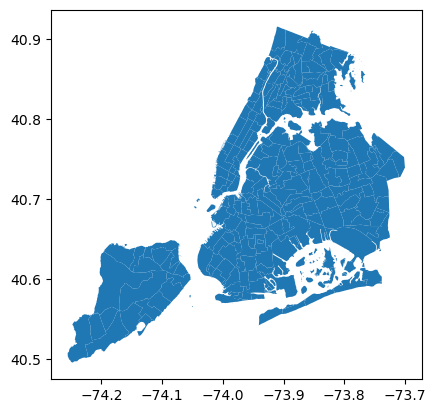

In [9]:
# quick sanity check of geometry with .plot() method
nta_shape.plot()

In [10]:
# returns the GeoDataFrame's Coordinate Reference System (CRS)
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# changing the CRS to 2263
nta_shape = nta_shape.to_crs(epsg=2263)

nta_shape.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Learn mroe about EPSG:2263: [NAD83 / New York Long Island (ftUS)](https://spatialreference.org/ref/epsg/2263/)

In [12]:
# returning the geometry column name
nta_shape.geometry.name

'geometry'

In [13]:
# transforming geometry to centroid
(nta_shape
 .centroid
 .head()
)

0    POINT (1049933.341 191191.775)
1    POINT (1012072.704 171751.423)
2    POINT (1010498.544 248629.604)
3    POINT (1039004.666 204692.860)
4    POINT (1037639.823 214080.938)
dtype: geometry

In [14]:
# returns the area of each geometry
(nta_shape
 .area
 .head()
)

0    7.741297e+07
1    8.209003e+07
2    1.471672e+07
3    3.883604e+07
4    2.945384e+07
dtype: float64

In [15]:
# returns the length of each geometry
(nta_shape
 .length
 .head()
)

0    45401.157403
1    43703.029226
2    18937.254611
3    30731.465849
4    25848.529527
dtype: float64

In [16]:
# returns the bounds of each geometry
(nta_shape
 .bounds
 .head()
)

minx           miny          maxx           maxy
0  1.044355e+06  184845.847541  1.055350e+06  197904.544570
1  1.006464e+06  166079.738585  1.018348e+06  178005.554194
2  1.007222e+06  246205.578554  1.013128e+06  251177.316970
3  1.035460e+06  200143.118791  1.042379e+06  208550.910228
4  1.033886e+06  211172.958344  1.041164e+06  216741.218669

In [17]:
# returns the values for the bounds of the geometry
nta_shape.total_bounds

array([ 913174.90970924,  120131.46029321, 1067382.17174207,
        272847.44359869])

In [18]:
# returning the type of geometries
(nta_shape
 .geom_type
 .head()
)

0         Polygon
1    MultiPolygon
2         Polygon
3         Polygon
4         Polygon
dtype: object

In [19]:
# returning value counts of the type of geometries
(nta_shape
 .geom_type
 .value_counts()
)

Polygon         168
MultiPolygon     27
dtype: int64

In [20]:
# returning valid geometry
(nta_shape
 .is_valid
 .head()
)

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [21]:
# convert to desired crs
school_points = school_points.to_crs(2263)

print(f'shape of data: {school_points.shape}')
school_points.head()

shape of data: (1950, 8)


ATS Building_C Location_C                            Name  Geographic  \
0  01M015       M015       M015       P.S. 015 Roberto Clemente           1   
1  01M020       M020       M020            P.S. 020 Anna Silver           1   
2  01M034       M034       M034  P.S. 034 Franklin D. Roosevelt           1   
3  01M063       M063       M063       The STAR Academy - P.S.63           1   
4  01M064       M064       M064           P.S. 064 Robert Simon           1   

    Latitude  Longitude                       geometry  
0  40.722075 -73.978747  POINT (990141.051 202348.836)  
1  40.721305 -73.986312  POINT (988044.157 202067.879)  
2  40.726008 -73.975058  POINT (991163.193 203782.024)  
3  40.724440 -73.986214  POINT (988071.140 203210.063)  
4  40.723130 -73.981597  POINT (989350.980 202733.026)

In [22]:
# returns the x-coordinate of each geometry
school_points['geometry'].x

0       9.901411e+05
1       9.880442e+05
2       9.911632e+05
3       9.880711e+05
4       9.893510e+05
            ...     
1945    1.014621e+06
1946    1.014071e+06
1947    1.011037e+06
1948    1.024125e+06
1949    9.862361e+05
Length: 1950, dtype: float64

In [23]:
# returns the y-coordinate of each geometry
school_points['geometry'].y

0       202348.836222
1       202067.879200
2       203782.023660
3       203210.062706
4       202733.025799
            ...      
1945    236767.138215
1946    241434.327142
1947    251611.087271
1948    238502.046492
1949    211574.179002
Length: 1950, dtype: float64

## 4.2 Basic Methods

In [24]:
# Met Museum lon/lat coordinates
point = Point(-73.96381364165454, 40.77933770631253)
crs = 4326

metmuseum = gpd.GeoSeries(point, crs=crs)

# assign metmuseum same crs as points
metmuseum = metmuseum.to_crs(school_points.crs)

# preview location
metmuseum

0    POINT (994271.786 223212.846)
dtype: geometry

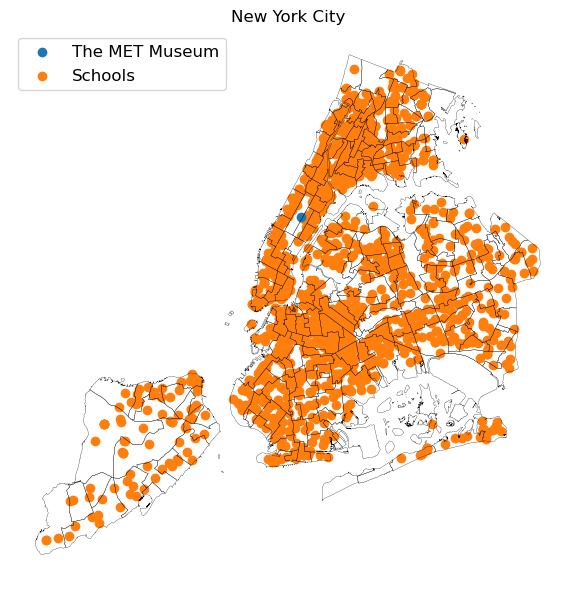

In [25]:
# plot met museum and school points
fig, ax = plt.subplots(figsize=(6, 6))

metmuseum.plot(
    ax=ax, 
    label='The MET Museum',
    zorder=2
)

school_points.plot(
    ax=ax,
    label='Schools'
)

nta_shape.plot(
    ax=ax,
    facecolor='None',
    linewidth=.2,
    zorder=2
)

plt.legend(loc=2, fontsize='large')
ax.set_title('New York City')
ax.axis('off')

plt.tight_layout()

In [26]:
# distance of schools to MET Museum
school_points.distance(metmuseum[0])

0       21268.988532
1       22042.980502
2       19677.911618
3       20941.808768
4       21062.700924
            ...     
1945    24449.822301
1946    26907.806077
1947    32977.819410
1948    33540.805754
1949    14143.245263
Length: 1950, dtype: float64

In [27]:
# farthest school to MET Museum
idx = (
    school_points
    .distance(metmuseum[0])
    .sort_values(ascending=False)
    .head(1)
    .index[0]
)

# preview furthest school from MET, distance is in feet
school_points.iloc[[idx]]

ATS Building_C Location_C                  Name  Geographic  \
1479  31R034       R034       R034  I.S. 034 Tottenville          31   

      Latitude  Longitude                       geometry  
1479   40.5083   -74.2434  POINT (916566.086 124558.184)

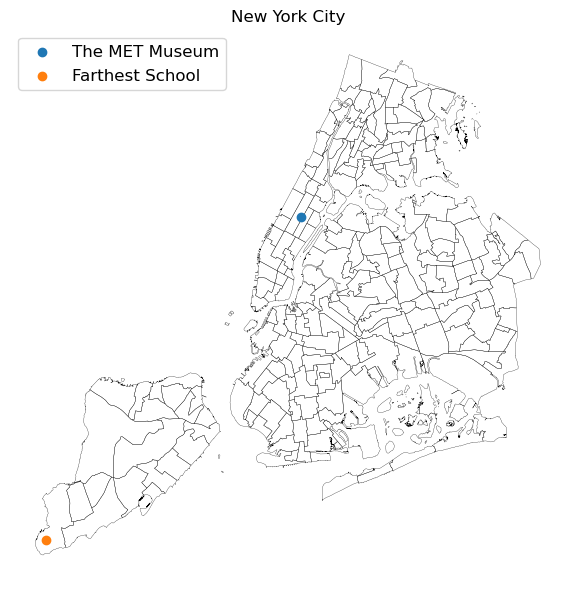

In [28]:
# plot met museum and farthest school point
fig, ax = plt.subplots(figsize=(6, 6))

metmuseum.plot(
    ax=ax, 
    label='The MET Museum',
    zorder=2
)
school_points.iloc[[idx]].plot(
    ax=ax,
    label='Farthest School'
)
nta_shape.plot(
    ax=ax,
    facecolor='None',
    linewidth=.2,
    zorder=-1
)

plt.legend(loc=2, fontsize='large')
ax.set_title('New York City')
ax.axis('off')

plt.tight_layout()

In [29]:
# returns a centroid that is guaranteed to be within the geometry
(nta_shape
 .representative_point()
 .head()
)

0    POINT (1050079.414 191562.976)
1    POINT (1012065.910 172056.304)
2    POINT (1010526.391 248650.323)
3    POINT (1039769.423 204335.516)
4    POINT (1037836.869 213931.453)
dtype: geometry

In [30]:
# printing the current CRS of the nta
print(f"Old CRS: {nta_shape.crs}")

# changing and printing the CRS to '4326'
print(f"New CRS: {nta_shape.to_crs(epsg=4326).crs}")

Old CRS: epsg:2263
New CRS: epsg:4326


<AxesSubplot: >

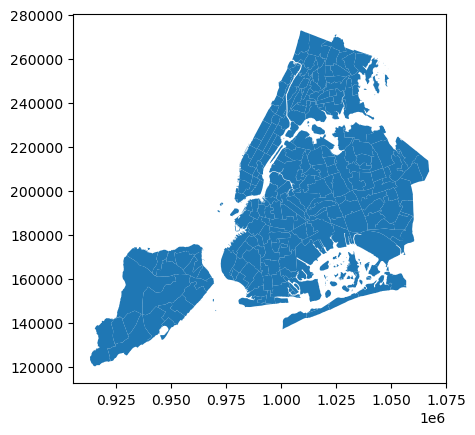

In [31]:
# plotting the geodataframe
nta_shape.plot()

<AxesSubplot: >

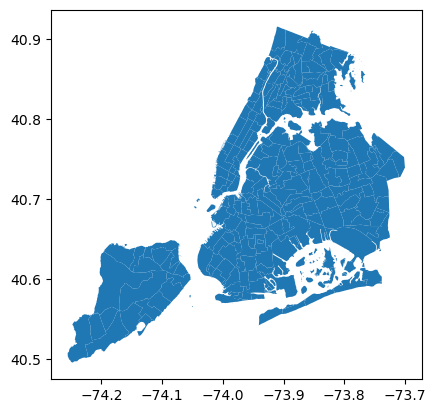

In [32]:
# changing the CRS and then plotting the geodataframe
(nta_shape
 .to_crs(epsg=4326)
 .plot()
)

(-74.28337200226193, -73.67223129208136, 40.47517224892777, 40.93651102056501)

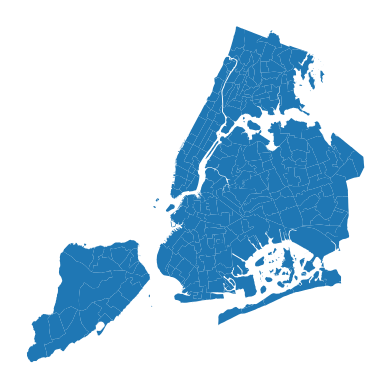

In [33]:
# turn off axis
(nta_shape
 .to_crs(epsg=4326)
 .plot()
)

plt.axis('off')

## 4.3 Create Centroids from Polygons

<AxesSubplot: >

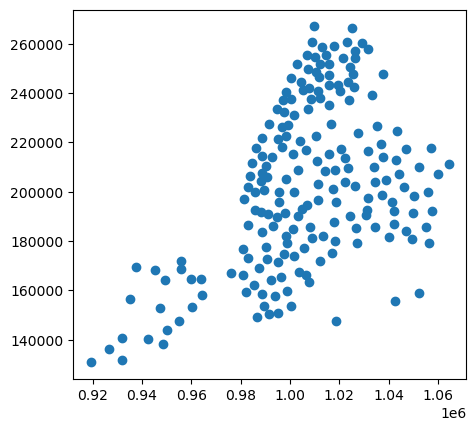

In [34]:
# returning the centroid of our shape and saving as a new column called 'centroid_column'
nta_shape['centroid_column'] = nta_shape.centroid

# setting our geometry as the new centroid column and then plotting 
(nta_shape
 .set_geometry('centroid_column')
 .plot()
)

## 4.4 Creating a GeoDataFrame from a DataFrame with Coordinates

In [35]:
# read new nta geometry data from url
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'

# assign new crs
nta_shape = gpd.read_file(path).to_crs(2263)

print(f'shape of data: {nta_shape.shape}')
nta_shape.head()

shape of data: (195, 9)


OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  
0  POLYGON ((1052995.809 196310.668, 1053081.291 ...  
1  MULTIPOLYGON (((1015235.757 174913.308, 101523...  
2  POLYGON ((1013128.128 250640.950, 1012847.931 ...  
3  POLYGON ((1040670.963 208321.638, 1040674.379 ...  
4  POLYGON ((1041061.605 215432.756, 1041114.781 ...

Simulate like we only have x, y data. Goal is to create a geodataframe.

In [36]:
# creating colums for the x and y coordinates of our geometries and deleting previous geometries
nta_shape['x'] = nta_shape.centroid.x
nta_shape['y'] = nta_shape.centroid.y
nta_shape_no_geometry = nta_shape.loc[:, ['NTAName', 'x', 'y']]

nta_shape_no_geometry.head()

NTAName             x              y
0                          St. Albans  1.049933e+06  191191.775207
1                            Canarsie  1.012073e+06  171751.423354
2                          Mount Hope  1.010499e+06  248629.604023
3  Pomonok-Flushing Heights-Hillcrest  1.039005e+06  204692.860234
4                       East Flushing  1.037640e+06  214080.937833

In [37]:
# Generate GeometryArray of point geometries from x, y coordinates
geometry = gpd.points_from_xy(
    nta_shape_no_geometry['x'],
    nta_shape_no_geometry['y']
)

nta_shape_with_geometry = gpd.GeoDataFrame(
    nta_shape_no_geometry,
    geometry=geometry
)

# previewing our new point geometry column
nta_shape_with_geometry.head()

NTAName             x              y  \
0                          St. Albans  1.049933e+06  191191.775207   
1                            Canarsie  1.012073e+06  171751.423354   
2                          Mount Hope  1.010499e+06  248629.604023   
3  Pomonok-Flushing Heights-Hillcrest  1.039005e+06  204692.860234   
4                       East Flushing  1.037640e+06  214080.937833   

                         geometry  
0  POINT (1049933.341 191191.775)  
1  POINT (1012072.704 171751.423)  
2  POINT (1010498.544 248629.604)  
3  POINT (1039004.666 204692.860)  
4  POINT (1037639.823 214080.938)

<AxesSubplot: >

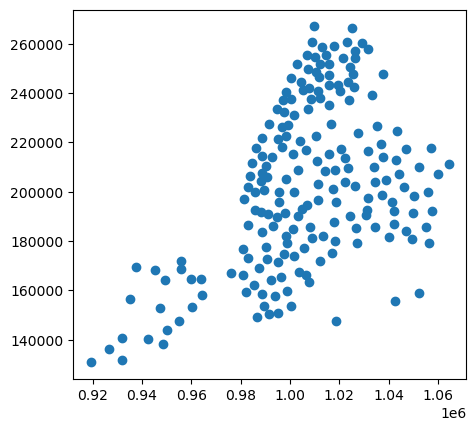

In [38]:
# plotting our data
nta_shape_with_geometry.plot()

# 5. Making Maps

GeoPandas has three basic classes of geometric objects (which are actually shapely objects):

- Points / Multi-Points

- Lines / Multi-Lines

- Polygons / Multi-Polygons

## 5.1 Points

In [39]:
# retrieve new schools geometry data
path = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(path).to_crs(epsg=2263)

print(f'shape of data: {school_points.shape}')
school_points.head()

shape of data: (1950, 8)


ATS Building_C Location_C                            Name  Geographic  \
0  01M015       M015       M015       P.S. 015 Roberto Clemente           1   
1  01M020       M020       M020            P.S. 020 Anna Silver           1   
2  01M034       M034       M034  P.S. 034 Franklin D. Roosevelt           1   
3  01M063       M063       M063       The STAR Academy - P.S.63           1   
4  01M064       M064       M064           P.S. 064 Robert Simon           1   

    Latitude  Longitude                       geometry  
0  40.722075 -73.978747  POINT (990141.051 202348.836)  
1  40.721305 -73.986312  POINT (988044.157 202067.879)  
2  40.726008 -73.975058  POINT (991163.193 203782.024)  
3  40.724440 -73.986214  POINT (988071.140 203210.063)  
4  40.723130 -73.981597  POINT (989350.980 202733.026)

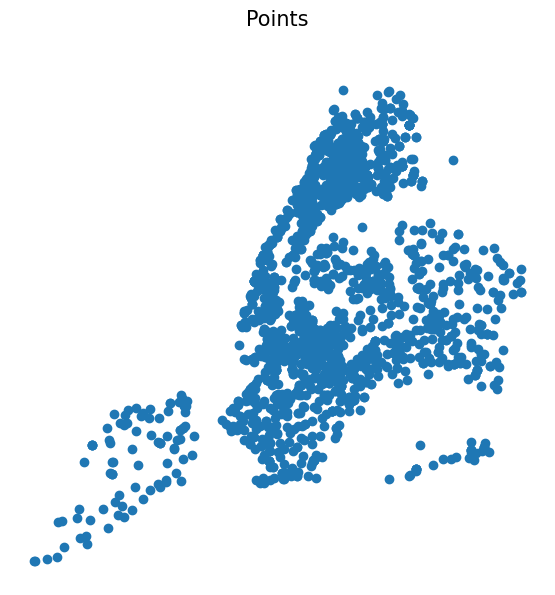

In [40]:
fig, ax = plt.subplots(figsize=(6, 6)) 

school_points.plot(
    ax=ax, 
    color='#1f77b4'
)

ax.set_title('Points', pad=30, fontsize=15)
plt.axis('off')

plt.tight_layout()

## 5.2 Lines

In [41]:
# streets geometries, large size so takes a few seconds
url = 'https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=GeoJSON'
streets = gpd.read_file(url).to_crs(epsg=2263)

print(f'shape of data: {streets.shape}')
streets.head()

shape of data: (121958, 33)


rw_type l_low_hn pre_direct st_width  r_zip r_low_hn bike_lane post_type  \
0       1       50       None     42.0  10280       51      None        PL   
1       1       66       None     42.0  10280       65      None        PL   
2       1       84       None     42.0  10280       83      None        PL   
3       1     None       None     42.0  10280     None      None        PL   
4       1     None       None     24.0  10004     None      None        PL   

   r_blkfc_id bike_trafd  ... snow_pri borocode trafdir pre_modifi  \
0  1222601917       None  ...        C        1      TW       None   
1  1222604562       None  ...        C        1      TW       None   
2  1222600933       None  ...        C        1      TW       None   
3  1222600931       None  ...        C        1      TW       None   
4   212262395       None  ...        C        1      TF       None   

     st_label physicalid  st_name    created l_high_hn  \
0  BATTERY PL          3  BATTERY 2007-11-29        64   
1  BATTERY PL          5  BATTERY 2007-11-29        82   
2  BATTERY PL          6  BATTERY 2007-11-29        98   
3  BATTERY PL          8  BATTERY 2007-11-29      None   
4  BATTERY PL         14  BATTERY 2011-04-22      None   

                                            geometry  
0  MULTILINESTRING ((979278.595 196555.690, 97929...  
1  MULTILINESTRING ((979377.413 196797.951, 97950...  
2  MULTILINESTRING ((979503.289 197024.782, 97964...  
3  MULTILINESTRING ((979553.746 196059.826, 97952...  
4  MULTILINESTRING ((980288.092 195963.182, 98026...  

[5 rows x 33 columns]

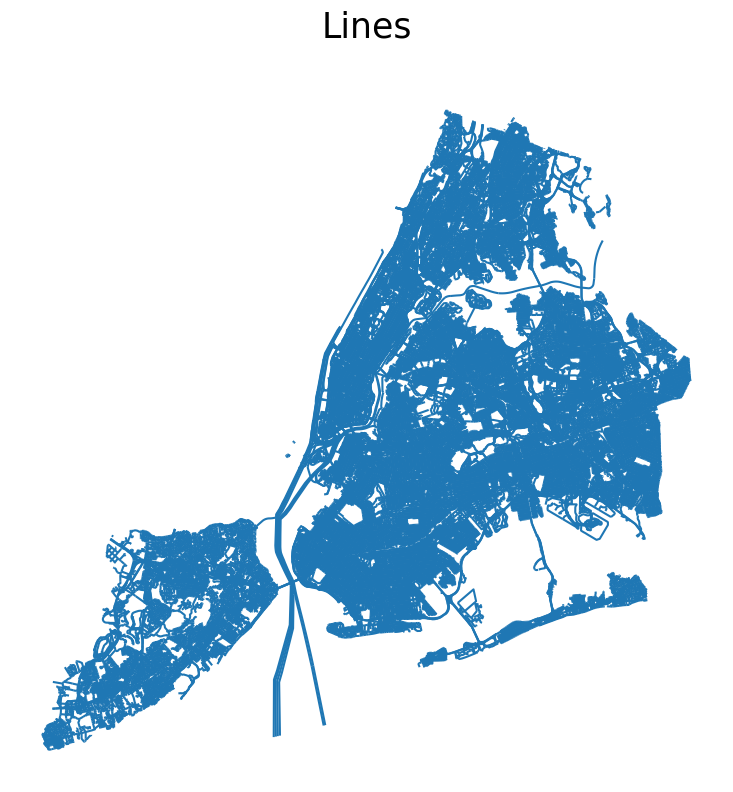

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
 
streets.plot(
    ax=ax, 
    color='#1f77b4'
)

ax.set_title('Lines', pad=30, fontsize=25)
plt.axis('off')

plt.tight_layout()

## 5.3 Polygons

In [43]:
# retrieve new nta geometries
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path).to_crs(epsg=2263)

print(f'shape of data: {nta_shape.shape}')
nta_shape.head()

shape of data: (195, 9)


OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  
0  POLYGON ((1052995.809 196310.668, 1053081.291 ...  
1  MULTIPOLYGON (((1015235.757 174913.308, 101523...  
2  POLYGON ((1013128.128 250640.950, 1012847.931 ...  
3  POLYGON ((1040670.963 208321.638, 1040674.379 ...  
4  POLYGON ((1041061.605 215432.756, 1041114.781 ...

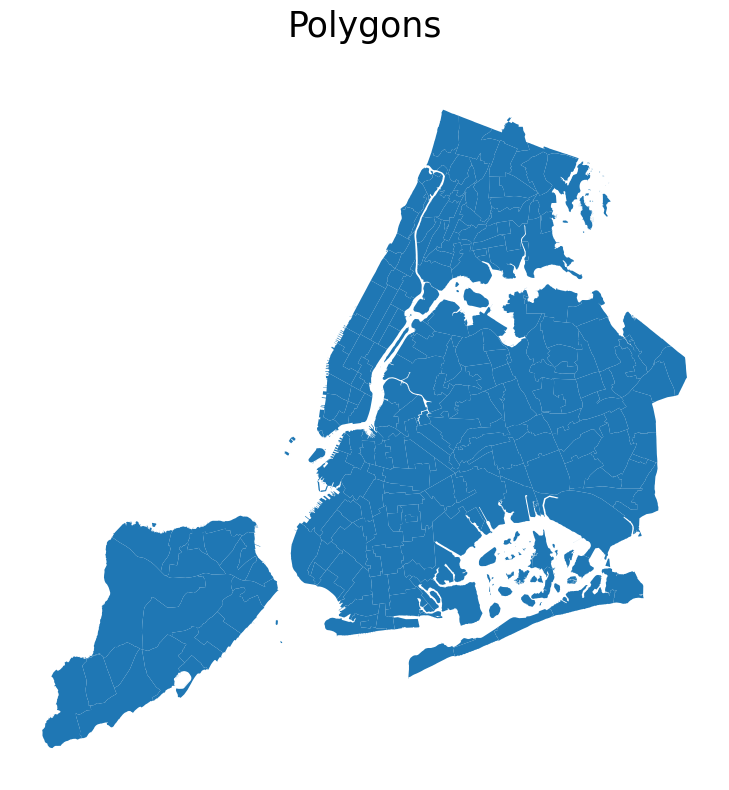

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))

nta_shape.plot(
    ax=ax, 
    color='#1f77b4'
) 

ax.set_title('Polygons', pad=30, fontsize=25)
plt.axis('off')

plt.tight_layout()

## 5.4 Maps with Layers

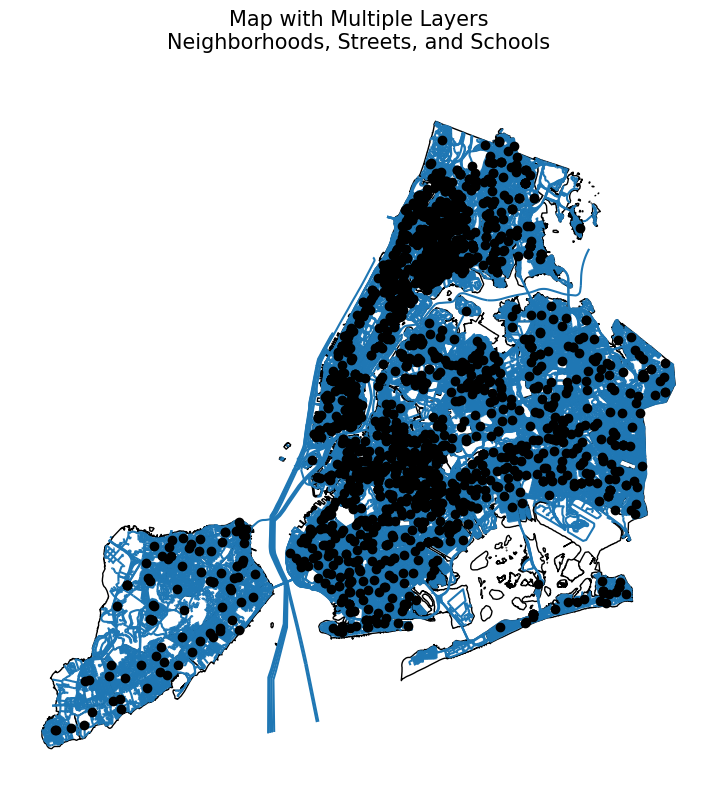

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))

# nta
nta_shape.plot(
    ax=ax, 
    color='white', 
    edgecolor='black', 
    zorder=0
)

# streets
streets.plot(
    ax=ax, 
    zorder=1
)

# schools
school_points.plot(
    ax=ax, 
    color='black', 
    zorder=1
)

ax.set_title('Map with Multiple Layers\nNeighborhoods, Streets, and Schools', pad=30, fontsize=15)
plt.axis('off')

plt.tight_layout()

## 5.5 Adding Background Map

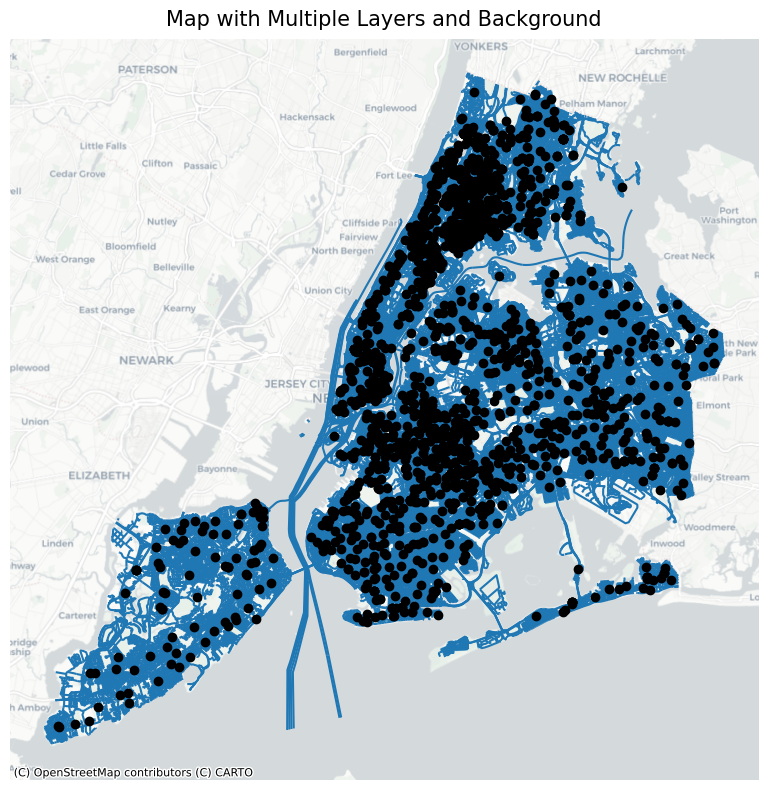

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))

# add background layer source
source = ctx.providers.CartoDB.Positron

nta_shape.plot(
    ax=ax, 
    color='white', 
    edgecolor='black', 
    zorder=0
)

streets.plot(
    ax=ax, 
    zorder=1
)

school_points.plot(
    ax=ax, 
    color='black', 
    zorder=2
)

# adding basemap
ctx.add_basemap(
    ax, 
    crs=2263, 
    source=source
)

ax.set_title(
    'Map with Multiple Layers and Background',
    pad=10, fontsize=15
)
plt.axis('off')

plt.tight_layout()

## 5.6 Clip Data

In [47]:
# clipping the school points that only fall within the nta shapes
school_points_clipped = gpd.clip(
    school_points,
    nta_shape
)

school_points_clipped.shape

(1950, 8)

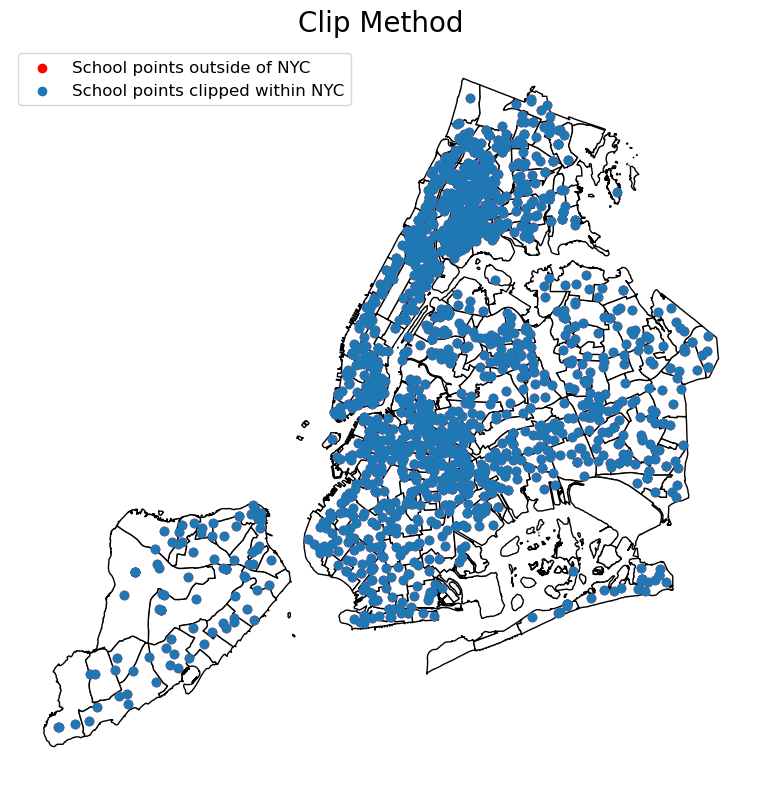

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))

nta_shape.plot(
    ax=ax, 
    color="white", 
    edgecolor='black', 
    zorder=0
)    

# plotting all points
school_points.plot(
    ax=ax, 
    color='red', 
    zorder=1,
    label='School points outside of NYC'
)

# plotting only the clipped points
school_points_clipped.plot(
    ax=ax, 
    color='#1f77b4', 
    zorder=2, 
    label='School points clipped within NYC'
)

ax.set_title('Clip Method', pad=10, fontsize=20)
plt.legend(loc='upper left', fontsize=12)
plt.axis('off')

plt.tight_layout()

# 6. Joining Data

## 6.1 Attribute Join

In [49]:
# new nta geometries
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print(f'shape of data: {nta_shape.shape}')
nta_shape.head()

shape of data: (195, 9)


OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  
0  POLYGON ((-73.75205 40.70524, -73.75175 40.704...  
1  MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ...  
2  POLYGON ((-73.89561 40.85458, -73.89663 40.852...  
3  POLYGON ((-73.79640 40.73829, -73.79639 40.738...  
4  POLYGON ((-73.79493 40.75781, -73.79475 40.755...

In [50]:
# reading in population by nta data
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

print(f'shape of data: {nyc_pop.shape}')
nyc_pop.head()

shape of data: (390, 6)


Borough  Year  FIPS County Code NTA Code                         NTA Name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   
3   Bronx  2000                 5     BX06                          Belmont   
4   Bronx  2000                 5     BX07                        Bronxdale   

   Population  
0       28149  
1       35422  
2       55329  
3       25967  
4       34309

In [51]:
print(f"years: {nyc_pop['Year'].unique()}")

# only saving data from year 2010; dropping year 2000 records
# population data may be outdated, FYI
nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

print(f"select one year: {nyc_pop['Year'].unique()}")

years: [2000 2010]
select one year: [2010]


In [52]:
# merging our nta shape data with the population data
nta_with_pop = nta_shape.merge(
    nyc_pop, 
    left_on='NTACode', 
    right_on='NTA Code'
)

nta_with_pop.head()

OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry   Borough  Year  \
0  POLYGON ((-73.75205 40.70524, -73.75175 40.704...    Queens  2010   
1  MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ...  Brooklyn  2010   
2  POLYGON ((-73.89561 40.85458, -73.89663 40.852...     Bronx  2010   
3  POLYGON ((-73.79640 40.73829, -73.79639 40.738...    Queens  2010   
4  POLYGON ((-73.79493 40.75781, -73.79475 40.755...    Queens  2010   

   FIPS County Code NTA Code                            NTA Name  Population  
0                81     QN08                          St. Albans       48593  
1                47     BK50                            Canarsie       83693  
2                 5     BX41                          Mount Hope       51807  
3                81     QN38  Pomonok-Flushing Heights-Hillcrest       34034  
4                81     QN52                       East Flushing       26982

## 6.2 Spatial Join

In [53]:
# new nta geometries
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print(f'shape of data: {nta_shape.shape}')
nta_shape.head()

shape of data: (195, 9)


OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  
0  POLYGON ((-73.75205 40.70524, -73.75175 40.704...  
1  MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ...  
2  POLYGON ((-73.89561 40.85458, -73.89663 40.852...  
3  POLYGON ((-73.79640 40.73829, -73.79639 40.738...  
4  POLYGON ((-73.79493 40.75781, -73.79475 40.755...

In [54]:
# new school points geometries
path = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(path).to_crs(2263)

print(f'shape of data: {school_points.shape}')
school_points.head()

shape of data: (1950, 8)


ATS Building_C Location_C                            Name  Geographic  \
0  01M015       M015       M015       P.S. 015 Roberto Clemente           1   
1  01M020       M020       M020            P.S. 020 Anna Silver           1   
2  01M034       M034       M034  P.S. 034 Franklin D. Roosevelt           1   
3  01M063       M063       M063       The STAR Academy - P.S.63           1   
4  01M064       M064       M064           P.S. 064 Robert Simon           1   

    Latitude  Longitude                       geometry  
0  40.722075 -73.978747  POINT (990141.051 202348.836)  
1  40.721305 -73.986312  POINT (988044.157 202067.879)  
2  40.726008 -73.975058  POINT (991163.193 203782.024)  
3  40.724440 -73.986214  POINT (988071.140 203210.063)  
4  40.723130 -73.981597  POINT (989350.980 202733.026)

In [55]:
# identifying the CRS
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [56]:
# identifying the CRS
school_points.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [57]:
# changing CRS so they both match
nta_shape = nta_shape.to_crs(school_points.crs)
nta_shape.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [58]:
# spatial join nta data to the school points data with operation = 'intersects'
school_points_with_nta = gpd.sjoin(
    school_points,
    nta_shape, 
    how="inner", 
    predicate='intersects'
)

school_points_with_nta.head()

ATS Building_C Location_C                            Name  Geographic  \
0  01M015       M015       M015       P.S. 015 Roberto Clemente           1   
2  01M034       M034       M034  P.S. 034 Franklin D. Roosevelt           1   
4  01M064       M064       M064           P.S. 064 Robert Simon           1   
5  01M110       M110       M110   P.S. 110 Florence Nightingale           1   
6  01M134       M134       M134        P.S. 134 Henrietta Szold           1   

    Latitude  Longitude                       geometry  index_right  OBJECTID  \
0  40.722075 -73.978747  POINT (990141.051 202348.836)          105       106   
2  40.726008 -73.975058  POINT (991163.193 203782.024)          105       106   
4  40.723130 -73.981597  POINT (989350.980 202733.026)          105       106   
5  40.716200 -73.979800  POINT (989849.668 200208.320)          105       106   
6  40.714248 -73.983854  POINT (988725.975 199496.911)          105       106   

   BoroCode   BoroName CountyFIPS NTACode          NTAName   Shape__Area  \
0         1  Manhattan        061    MN28  Lower East Side  2.329830e+07   
2         1  Manhattan        061    MN28  Lower East Side  2.329830e+07   
4         1  Manhattan        061    MN28  Lower East Side  2.329830e+07   
5         1  Manhattan        061    MN28  Lower East Side  2.329830e+07   
6         1  Manhattan        061    MN28  Lower East Side  2.329830e+07   

   Shape__Length  
0   26820.817087  
2   26820.817087  
4   26820.817087  
5   26820.817087  
6   26820.817087

In [59]:
# number of schools per NTA top 20
(school_points_with_nta
 .groupby(by='NTAName')['ATS']
 .count()
 .sort_values(ascending=False)
 .head(20)
)

NTAName
Mott Haven-Port Morris                              35
Brownsville                                         33
East Concourse-Concourse Village                    32
East New York                                       31
Crown Heights North                                 29
Melrose South-Mott Haven North                      29
Stuyvesant Heights                                  28
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill    28
Claremont-Bathgate                                  27
Central Harlem North-Polo Grounds                   26
East Harlem South                                   26
Canarsie                                            24
Bushwick South                                      24
Soundview-Castle Hill-Clason Point-Harding Park     23
Sunset Park West                                    23
Upper West Side                                     22
Marble Hill-Inwood                                  22
Van Cortlandt Village                               22
Ea

# 7. Indexing and Selecting Data

In [60]:
# new nta geometries
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print(f'shape of data: {nta_shape.shape}')
nta_shape.head()

shape of data: (195, 9)


OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  
0  POLYGON ((-73.75205 40.70524, -73.75175 40.704...  
1  MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ...  
2  POLYGON ((-73.89561 40.85458, -73.89663 40.852...  
3  POLYGON ((-73.79640 40.73829, -73.79639 40.738...  
4  POLYGON ((-73.79493 40.75781, -73.79475 40.755...

<AxesSubplot: >

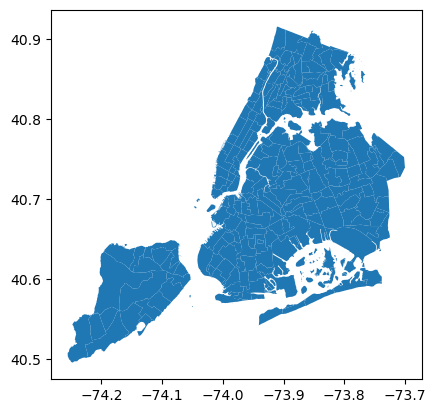

In [61]:
# sample plot
nta_shape.plot()

<AxesSubplot: >

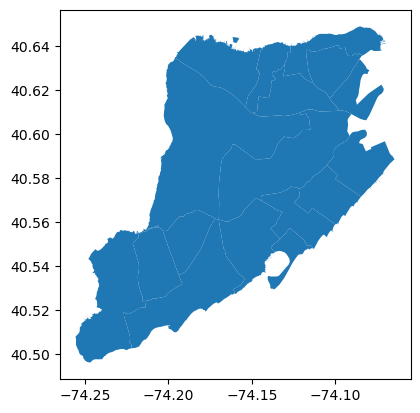

In [62]:
# slicing the nta data with everything up to lon = -74.1
(nta_shape
 .cx[:-74.1, :]
 .plot()
)

<AxesSubplot: >

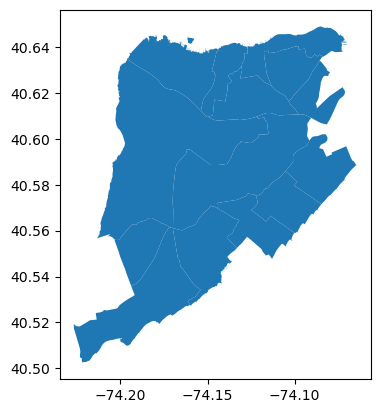

In [63]:
# slicing the nta data with everything up to lon = -74.1 and everything after lat = 40.56
(nta_shape
 .cx[:-74.1, 40.56:]
 .plot()
)

# 8. Coordinate Reference Systems

In [64]:
# new nta geometries
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print(f'shape of data: {nta_shape.shape}')
nta_shape.head()

shape of data: (195, 9)


OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  
0  POLYGON ((-73.75205 40.70524, -73.75175 40.704...  
1  MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ...  
2  POLYGON ((-73.89561 40.85458, -73.89663 40.852...  
3  POLYGON ((-73.79640 40.73829, -73.79639 40.738...  
4  POLYGON ((-73.79493 40.75781, -73.79475 40.755...

In [65]:
# checking the current CRS
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

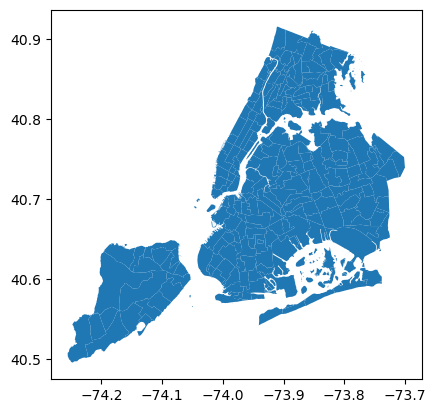

In [66]:
# sanity plot
nta_shape.plot()

<AxesSubplot: >

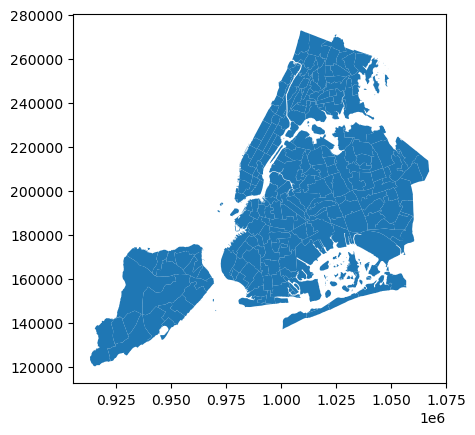

In [67]:
# switching CRS of nta to epsg = 2263
(nta_shape
 .to_crs(epsg=2263)
 .plot()
)

# 9. Types of Maps

In [68]:
# nta population data
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

print(nyc_pop.shape)
nyc_pop.head()

(390, 6)


Borough  Year  FIPS County Code NTA Code                         NTA Name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   
3   Bronx  2000                 5     BX06                          Belmont   
4   Bronx  2000                 5     BX07                        Bronxdale   

   Population  
0       28149  
1       35422  
2       55329  
3       25967  
4       34309

In [69]:
# saving only the population numbers for the year 2010
nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

nyc_pop.head()

Borough  Year  FIPS County Code NTA Code                         NTA Name  \
195   Bronx  2010                 5     BX01               Claremont-Bathgate   
196   Bronx  2010                 5     BX03  Eastchester-Edenwald-Baychester   
197   Bronx  2010                 5     BX05       Bedford Park-Fordham North   
198   Bronx  2010                 5     BX06                          Belmont   
199   Bronx  2010                 5     BX07                        Bronxdale   

     Population  
195       31078  
196       34517  
197       54415  
198       27378  
199       35538

In [70]:
# new nta geometries
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print(f'shape of data: {nta_shape.shape}')
nta_shape.head()

shape of data: (195, 9)


OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  
0  POLYGON ((-73.75205 40.70524, -73.75175 40.704...  
1  MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ...  
2  POLYGON ((-73.89561 40.85458, -73.89663 40.852...  
3  POLYGON ((-73.79640 40.73829, -73.79639 40.738...  
4  POLYGON ((-73.79493 40.75781, -73.79475 40.755...

In [71]:
# joining our nta population data to our nta shapes data
nta_pop = nta_shape.merge(
    nyc_pop,
    left_on='NTACode', 
    right_on='NTA Code', 
    how='inner'
)

nta_pop.head()

OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry   Borough  Year  \
0  POLYGON ((-73.75205 40.70524, -73.75175 40.704...    Queens  2010   
1  MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ...  Brooklyn  2010   
2  POLYGON ((-73.89561 40.85458, -73.89663 40.852...     Bronx  2010   
3  POLYGON ((-73.79640 40.73829, -73.79639 40.738...    Queens  2010   
4  POLYGON ((-73.79493 40.75781, -73.79475 40.755...    Queens  2010   

   FIPS County Code NTA Code                            NTA Name  Population  
0                81     QN08                          St. Albans       48593  
1                47     BK50                            Canarsie       83693  
2                 5     BX41                          Mount Hope       51807  
3                81     QN38  Pomonok-Flushing Heights-Hillcrest       34034  
4                81     QN52                       East Flushing       26982

In [72]:
# population crs
nta_pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [73]:
# transforming crs
nta_pop = nta_pop.to_crs(epsg=2263)

nta_pop.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [74]:
# returning the area of our nta as a new column 'sq_ft'
nta_pop['sq_ft'] = nta_pop.area

nta_pop.head()

OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry   Borough  Year  \
0  POLYGON ((1052995.809 196310.668, 1053081.291 ...    Queens  2010   
1  MULTIPOLYGON (((1015235.757 174913.308, 101523...  Brooklyn  2010   
2  POLYGON ((1013128.128 250640.950, 1012847.931 ...     Bronx  2010   
3  POLYGON ((1040670.963 208321.638, 1040674.379 ...    Queens  2010   
4  POLYGON ((1041061.605 215432.756, 1041114.781 ...    Queens  2010   

   FIPS County Code NTA Code                            NTA Name  Population  \
0                81     QN08                          St. Albans       48593   
1                47     BK50                            Canarsie       83693   
2                 5     BX41                          Mount Hope       51807   
3                81     QN38  Pomonok-Flushing Heights-Hillcrest       34034   
4                81     QN52                       East Flushing       26982   

          sq_ft  
0  7.741297e+07  
1  8.209003e+07  
2  1.471672e+07  
3  3.883604e+07  
4  2.945384e+07

In [75]:
# converting square feet to square miles and saving as a new column
nta_pop['sq_mi'] = nta_pop['sq_ft'] / 27878400

# creating a new column of the population density (pop/area) of each nta
nta_pop['density (pop/sq_mi)'] = nta_pop['Population'] / nta_pop['sq_mi']

nta_pop.head()   

OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry   Borough  Year  \
0  POLYGON ((1052995.809 196310.668, 1053081.291 ...    Queens  2010   
1  MULTIPOLYGON (((1015235.757 174913.308, 101523...  Brooklyn  2010   
2  POLYGON ((1013128.128 250640.950, 1012847.931 ...     Bronx  2010   
3  POLYGON ((1040670.963 208321.638, 1040674.379 ...    Queens  2010   
4  POLYGON ((1041061.605 215432.756, 1041114.781 ...    Queens  2010   

   FIPS County Code NTA Code                            NTA Name  Population  \
0                81     QN08                          St. Albans       48593   
1                47     BK50                            Canarsie       83693   
2                 5     BX41                          Mount Hope       51807   
3                81     QN38  Pomonok-Flushing Heights-Hillcrest       34034   
4                81     QN52                       East Flushing       26982   

          sq_ft     sq_mi  density (pop/sq_mi)  
0  7.741297e+07  2.776808         17499.587614  
1  8.209003e+07  2.944575         28422.780487  
2  1.471672e+07  0.527890         98139.847809  
3  3.883604e+07  1.393051         24431.260862  
4  2.945384e+07  1.056511         25538.771386

In [76]:
(nta_pop
 .sort_values(by='density (pop/sq_mi)', ascending=False)
 .iloc[:5,-6:]
)

NTA Code         NTA Name  Population         sq_ft     sq_mi  \
64      MN32        Yorkville       77942  1.364789e+07  0.489551   
169     BX40    Fordham South       28262  6.308877e+06  0.226300   
182     MN22     East Village       44136  1.090028e+07  0.390994   
71      MN14   Lincoln Square       61489  1.580557e+07  0.566947   
157     MN12  Upper West Side      132378  3.437995e+07  1.233211   

     density (pop/sq_mi)  
64         159211.251218  
169        124887.413205  
182        112881.625473  
71         108456.372770  
157        107344.149359

## 9.1 Choropleth Maps

<AxesSubplot: >

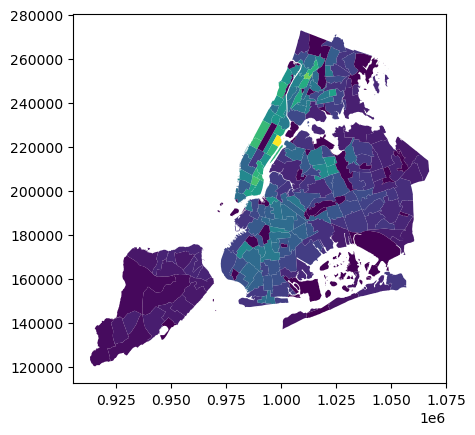

In [77]:
# plotting a choropleth map on the column 'density (pop/sq_mi)'
nta_pop.plot(column='density (pop/sq_mi)')

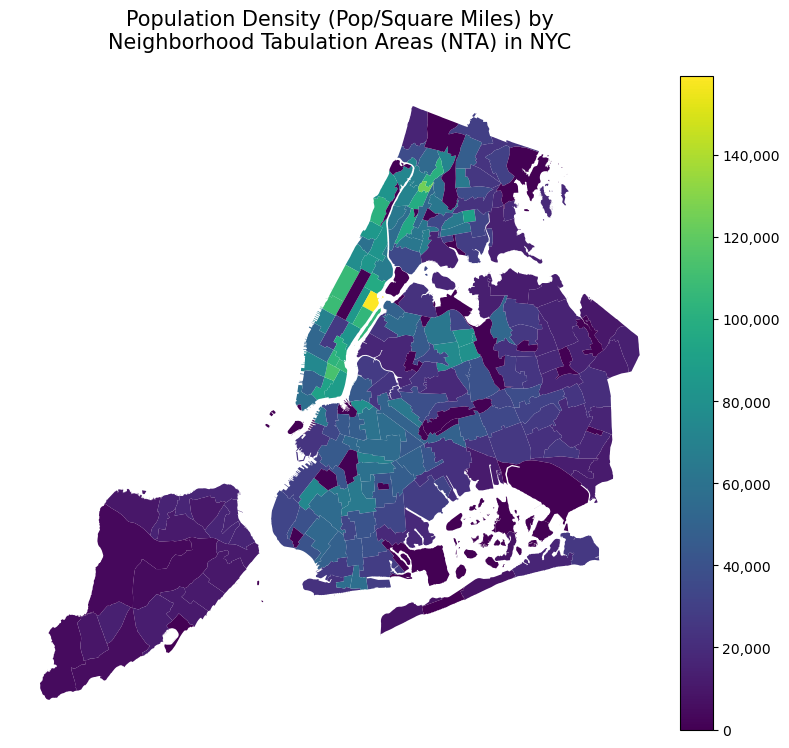

In [78]:
fig, ax = plt.subplots(figsize=(8,8))

# saving variable to format integers as strings with commas
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

# resizing the color bar to scale to the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# plotting 'density (pop/sq_mi)' as a choropleth map
nta_pop.plot(
    column='density (pop/sq_mi)', 
    ax=ax, # plotting on the generated axis
    cax=cax, # legend of the color bar
    legend=True, # turning on legend
    legend_kwds={'format':comma_fmt}
)

# setting title
ax.set_title(
    'Population Density (Pop/Square Miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
    fontsize=15,
    pad=20
)

ax.axis('off')

plt.tight_layout()

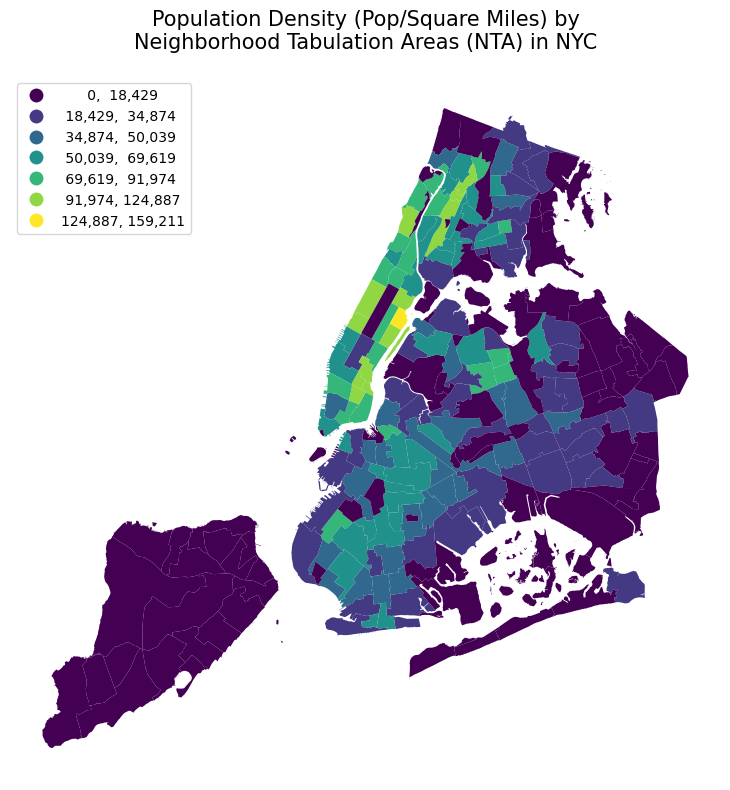

In [79]:
fig, ax = plt.subplots(figsize=(8, 8))

nta_pop.plot(
    column='density (pop/sq_mi)', 
    ax=ax, 
    legend=True, 
    scheme='fisher_jenks',
    k=7,
    legend_kwds={
        'loc': "upper left", 
        'fmt': "{:,.0f}",
        'fontsize': "10"
    }
)     
        
ax.set_title(
    'Population Density (Pop/Square Miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
    fontsize=15, 
    pad=20
)

plt.axis('off')

plt.tight_layout()

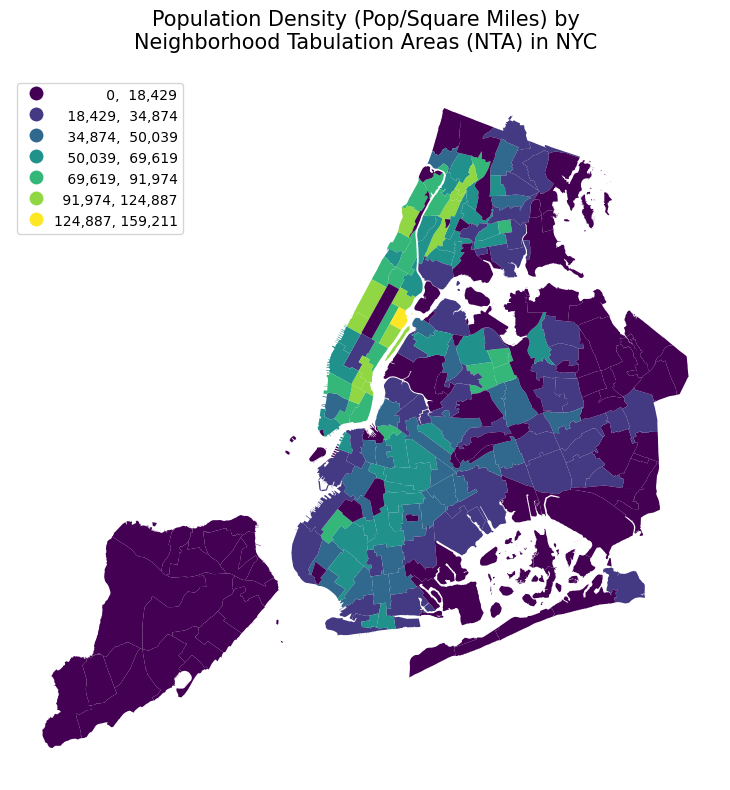

In [80]:
# align legend numbers

fig, ax = plt.subplots(figsize=(8, 8))

nta_pop.plot(
    column='density (pop/sq_mi)', 
    ax=ax, 
    legend=True, 
    scheme='fisher_jenks',
    k=7,
    legend_kwds={
        'loc': "upper left", 
        'fmt': "{:,.0f}",
        'fontsize': "10"
    }
)

# returning the legend
leg = ax.get_legend()

# making the legend labels right horizontal aligned
hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(155)  # need to adapt this manually
        row.mode= "expand"
        row.align="right"     
        
ax.set_title(
    'Population Density (Pop/Square Miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
    fontsize=15, pad=20
)

plt.axis('off')
plt.tight_layout()

## 9.2 Hexbin Map

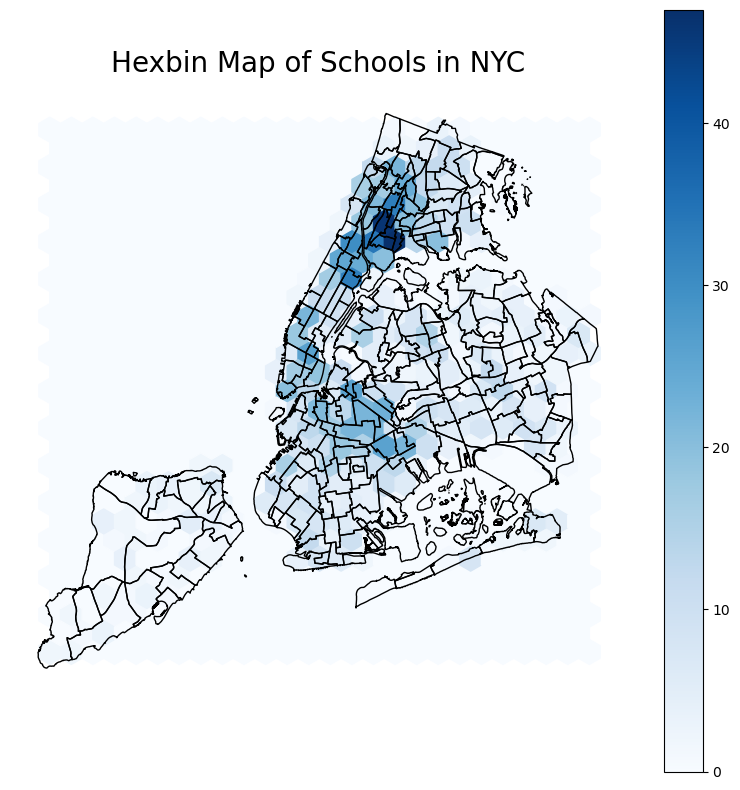

In [81]:
fig, ax = plt.subplots(figsize=(8, 8))

school_points['x'] = school_points['geometry'].x
school_points['y'] = school_points['geometry'].y
df = pd.DataFrame(school_points)

df.plot.hexbin(
    x='x', 
    y='y', 
    gridsize=25, 
    ax=ax,
    cmap='Blues'
)


(nta_shape
 .to_crs(epsg=2263)
 .plot(
     ax=ax, 
     color='None', 
     edgecolor='black')
 )

ax.set_title('Hexbin Map of Schools in NYC', fontsize=20, pad=10)
plt.axis('off')

fig.tight_layout()

## 9.3 Proportional Symbol Map

In [82]:
nta_pop['centroid'] = nta_pop.centroid
nta_pop = nta_pop.set_geometry('centroid')

nta_pop.head()

OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry   Borough  Year  \
0  POLYGON ((1052995.809 196310.668, 1053081.291 ...    Queens  2010   
1  MULTIPOLYGON (((1015235.757 174913.308, 101523...  Brooklyn  2010   
2  POLYGON ((1013128.128 250640.950, 1012847.931 ...     Bronx  2010   
3  POLYGON ((1040670.963 208321.638, 1040674.379 ...    Queens  2010   
4  POLYGON ((1041061.605 215432.756, 1041114.781 ...    Queens  2010   

   FIPS County Code NTA Code                            NTA Name  Population  \
0                81     QN08                          St. Albans       48593   
1                47     BK50                            Canarsie       83693   
2                 5     BX41                          Mount Hope       51807   
3                81     QN38  Pomonok-Flushing Heights-Hillcrest       34034   
4                81     QN52                       East Flushing       26982   

          sq_ft     sq_mi  density (pop/sq_mi)                        centroid  
0  7.741297e+07  2.776808         17499.587614  POINT (1049933.341 191191.775)  
1  8.209003e+07  2.944575         28422.780487  POINT (1012072.704 171751.423)  
2  1.471672e+07  0.527890         98139.847809  POINT (1010498.544 248629.604)  
3  3.883604e+07  1.393051         24431.260862  POINT (1039004.666 204692.860)  
4  2.945384e+07  1.056511         25538.771386  POINT (1037639.823 214080.938)

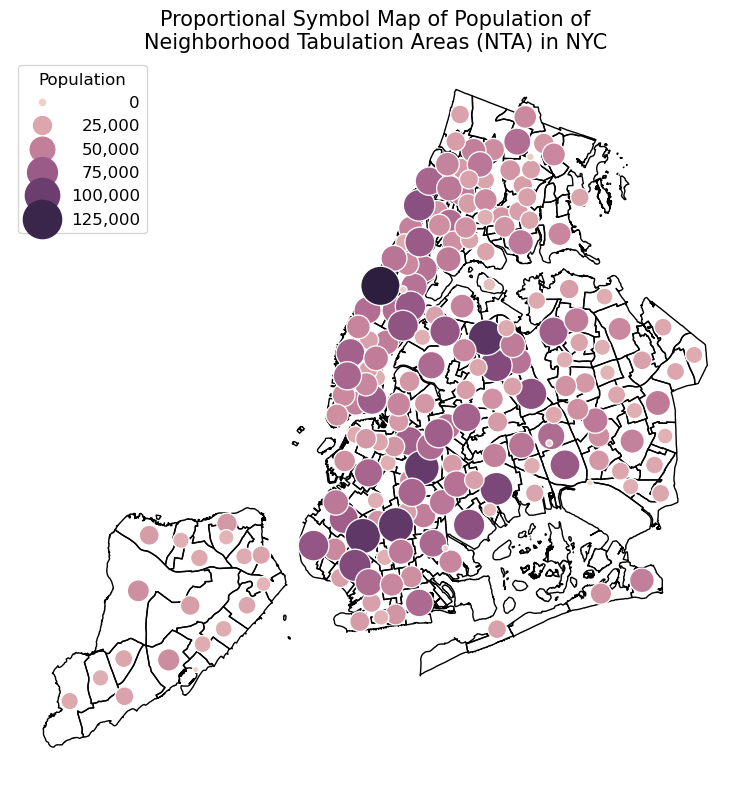

In [83]:
fig, ax = plt.subplots(figsize=(8,8))

ax = sns.scatterplot(
    x=nta_pop['centroid'].x,
    y=nta_pop['centroid'].y, 
    data=nta_pop, 
    size="Population",
    hue='Population',
    sizes=(20, 800)
)

(nta_shape
 .to_crs(epsg=2263)
 .plot(
     ax=ax, 
     color='None', 
     edgecolor='black',
     zorder=0)
)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
       
for i in range(len(current_labels)):
    current_labels[i] = int(current_labels[i])
    current_labels[i] = "{:,}".format((current_labels[i])) 
    
leg = ax.legend(
    current_handles, current_labels, 
    loc='upper left', 
    fontsize='large', 
    title='Population',  
    title_fontsize=12
)

hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(115)
        row.mode= "expand"
        row.align="right"

ax.set_title(
    'Proportional Symbol Map of Population of\nNeighborhood Tabulation Areas (NTA) in NYC', 
    fontsize=15
)
plt.axis('off')

plt.tight_layout()

# 10. Relationship Tests

In [84]:
# new nta geometries
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path).to_crs(2263)

print(f'shape of data: {nta_shape.shape}')
nta_shape.head()

shape of data: (195, 9)


OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  
0  POLYGON ((1052995.809 196310.668, 1053081.291 ...  
1  MULTIPOLYGON (((1015235.757 174913.308, 101523...  
2  POLYGON ((1013128.128 250640.950, 1012847.931 ...  
3  POLYGON ((1040670.963 208321.638, 1040674.379 ...  
4  POLYGON ((1041061.605 215432.756, 1041114.781 ...

In [85]:
# checking if our shape contains its centroid
(nta_shape['geometry']
 .contains(nta_shape.centroid)
 .value_counts()
)

True     186
False      9
dtype: int64

In [86]:
# checking to see if our centroid is within its shape
(nta_shape.centroid
 .within(nta_shape['geometry'])
 .value_counts()
)

True     186
False      9
dtype: int64

In [87]:
# checking if our representative point is within its shape
(nta_shape
 .representative_point()
 .within(nta_shape['geometry'])
 .value_counts()
)

True    195
dtype: int64

In [88]:
# checking to see if our centroid intersects with its shape
(nta_shape.centroid
 .intersects(nta_shape['geometry'])
 .value_counts()
)

True     186
False      9
dtype: int64

In [89]:
# making a new column called 'within' that identifies if our centroid is within its shape
nta_shape['within'] = (
    nta_shape
    .centroid
    .within(nta_shape['geometry'])
)

# printing the shape and head of centroids not within their shapes
print(nta_shape.loc[nta_shape['within'] == False].shape)
nta_shape.loc[nta_shape['within'] == False].head()

(9, 10)


OBJECTID  BoroCode       BoroName CountyFIPS NTACode  \
16         17         2          Bronx        005    BX10   
97         98         5  Staten Island        085    SI22   
159       160         2          Bronx        005    BX03   
165       166         4         Queens        081    QN10   
175       176         5  Staten Island        085    SI37   

                                               NTAName   Shape__Area  \
16                 Pelham Bay-Country Club-City Island  4.021430e+07   
97           West New Brighton-New Brighton-St. George  5.602857e+07   
159                    Eastchester-Edenwald-Baychester  4.026498e+07   
165  Breezy Point-Belle Harbor-Rockaway Park-Broad ...  9.962973e+07   
175                                 Stapleton-Rosebank  4.643336e+07   

     Shape__Length                                           geometry  within  
16   138093.364196  MULTIPOLYGON (((1042822.091 243443.078, 104255...   False  
97    66052.593706  POLYGON ((964105.455 171707.236, 963906.702 17...   False  
159   59283.878421  POLYGON ((1041426.060 260984.664, 1041166.856 ...   False  
165  114592.200367  MULTIPOLYGON (((1016626.242 146413.036, 101665...   False  
175   55199.757731  POLYGON ((964105.455 171707.236, 964107.817 17...   False

In [90]:
# returning the count of unique values of centroids not within their shapes
(nta_shape
 .loc[nta_shape['within'] == False]
 .loc[:, ['NTAName']]
 .value_counts()
)

NTAName                                              
Breezy Point-Belle Harbor-Rockaway Park-Broad Channel    1
Eastchester-Edenwald-Baychester                          1
Pelham Bay-Country Club-City Island                      1
Stapleton-Rosebank                                       1
West New Brighton-New Brighton-St. George                1
park-cemetery-etc-Bronx                                  1
park-cemetery-etc-Brooklyn                               1
park-cemetery-etc-Manhattan                              1
park-cemetery-etc-Queens                                 1
dtype: int64

In [91]:
# saving centroids that are not within their shapes as a new dataframe called 'multi_shapes'
multi_shapes = nta_shape.loc[nta_shape['within'] == False]

multi_shapes.loc[:, ['NTAName', 'geometry']]

NTAName  \
16                 Pelham Bay-Country Club-City Island   
97           West New Brighton-New Brighton-St. George   
159                    Eastchester-Edenwald-Baychester   
165  Breezy Point-Belle Harbor-Rockaway Park-Broad ...   
175                                 Stapleton-Rosebank   
178                        park-cemetery-etc-Manhattan   
179                           park-cemetery-etc-Queens   
187                         park-cemetery-etc-Brooklyn   
194                            park-cemetery-etc-Bronx   

                                              geometry  
16   MULTIPOLYGON (((1042822.091 243443.078, 104255...  
97   POLYGON ((964105.455 171707.236, 963906.702 17...  
159  POLYGON ((1041426.060 260984.664, 1041166.856 ...  
165  MULTIPOLYGON (((1016626.242 146413.036, 101665...  
175  POLYGON ((964105.455 171707.236, 964107.817 17...  
178  MULTIPOLYGON (((981218.620 188658.468, 980940....  
179  MULTIPOLYGON (((970216.682 145646.394, 970226....  
187  MULTIPOLYGON (((1007821.705 152884.738, 100783...  
194  MULTIPOLYGON (((1020355.761 236656.298, 102035...

In [92]:
# Returns the union of the shape and their centroids to plot together.
multi_shapes.centroid.union(multi_shapes['geometry'])

16     GEOMETRYCOLLECTION (POLYGON ((1042551.432 2433...
97     GEOMETRYCOLLECTION (POLYGON ((963906.702 17169...
159    GEOMETRYCOLLECTION (POLYGON ((1041166.856 2610...
165    GEOMETRYCOLLECTION (POLYGON ((1016653.005 1463...
175    GEOMETRYCOLLECTION (POLYGON ((964107.817 17168...
178    GEOMETRYCOLLECTION (POLYGON ((980940.084 18843...
179    GEOMETRYCOLLECTION (POLYGON ((970226.876 14564...
187    GEOMETRYCOLLECTION (POLYGON ((1007831.763 1528...
194    GEOMETRYCOLLECTION (POLYGON ((1020359.318 2366...
dtype: geometry

# Identifying centroids not located within their shape

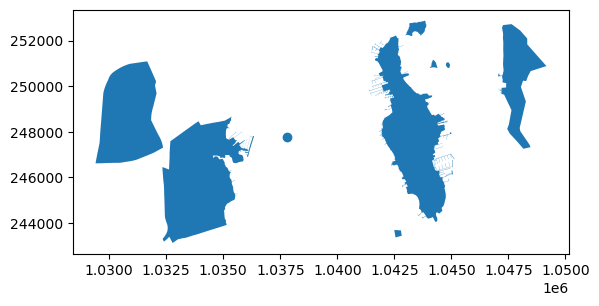

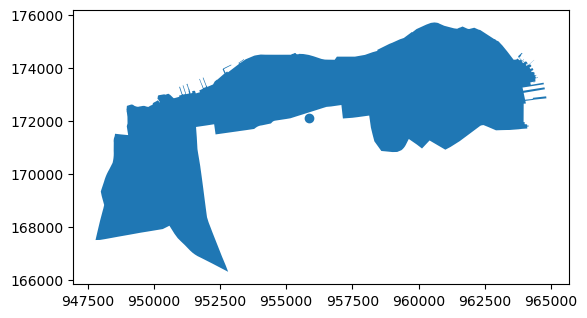

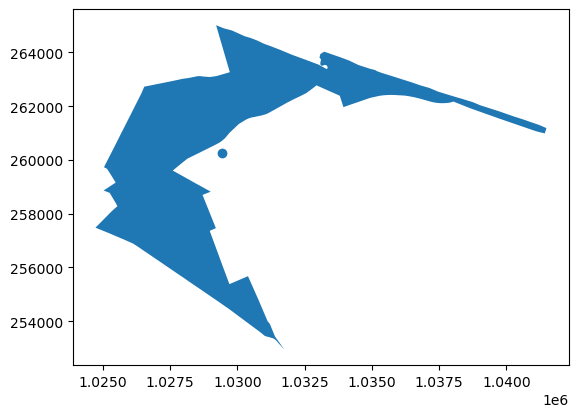

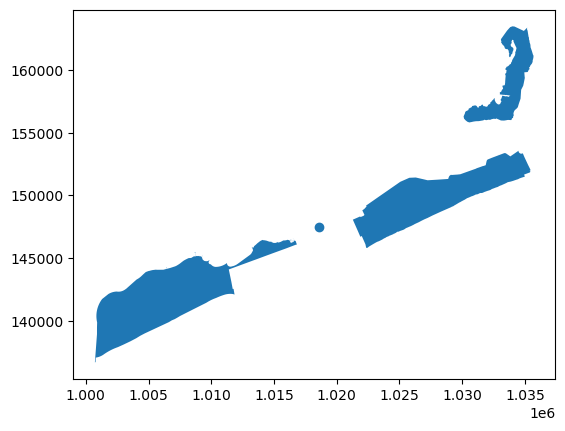

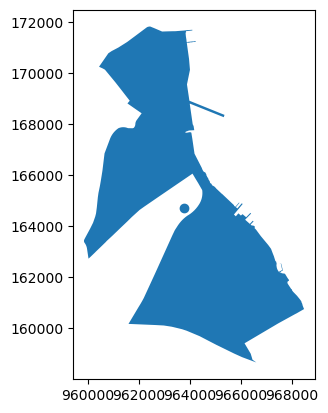

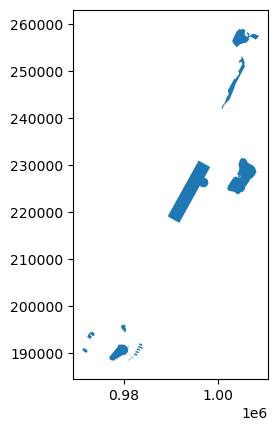

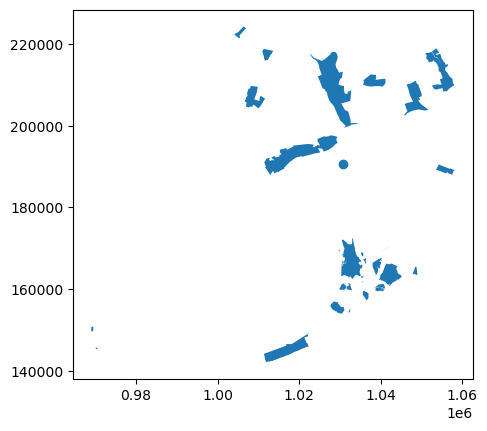

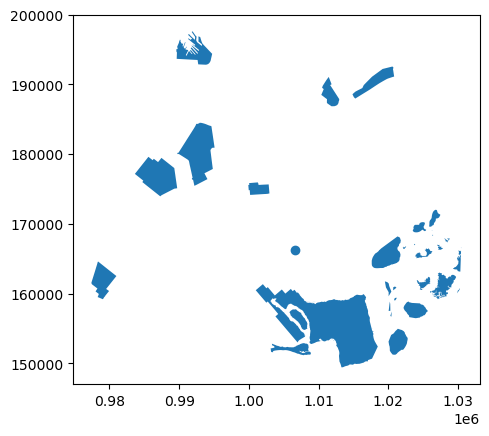

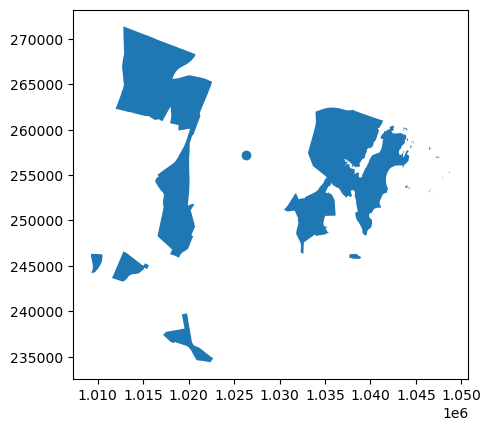

In [93]:
# saving the shape, centroid union as a new name called 'multi_shapes'
multi_shapes = (
    multi_shapes
    .centroid
    .union(multi_shapes['geometry'])
)

# plotting the shapes and their centroids that do not fall within their shape
for i in range(len(multi_shapes)):
    multi_shapes.iloc[[i]].plot()

# 11. Set Operations with Overlay

In [94]:
# new nta geometries
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path).to_crs(2263)

print(f'shape of data: {nta_shape.shape}')
nta_shape.head()

shape of data: (195, 9)


OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  
0  POLYGON ((1052995.809 196310.668, 1053081.291 ...  
1  MULTIPOLYGON (((1015235.757 174913.308, 101523...  
2  POLYGON ((1013128.128 250640.950, 1012847.931 ...  
3  POLYGON ((1040670.963 208321.638, 1040674.379 ...  
4  POLYGON ((1041061.605 215432.756, 1041114.781 ...

In [95]:
# offsetting the nta data 10,000 feet east and north so we can perform overlay operations
# saving as a new column called 'offset'
nta_shape['offset'] = (
    nta_shape
    .geometry
    .translate(10000, 10000)
)

nta_shape.head()

OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  \
0  POLYGON ((1052995.809 196310.668, 1053081.291 ...   
1  MULTIPOLYGON (((1015235.757 174913.308, 101523...   
2  POLYGON ((1013128.128 250640.950, 1012847.931 ...   
3  POLYGON ((1040670.963 208321.638, 1040674.379 ...   
4  POLYGON ((1041061.605 215432.756, 1041114.781 ...   

                                              offset  
0  POLYGON ((1062995.809 206310.668, 1063081.291 ...  
1  MULTIPOLYGON (((1025235.757 184913.308, 102523...  
2  POLYGON ((1023128.128 260640.950, 1022847.931 ...  
3  POLYGON ((1050670.963 218321.638, 1050674.379 ...  
4  POLYGON ((1051061.605 225432.756, 1051114.781 ...

Text(0.5, 1.0, 'Offset = 10,000 ft in both x and y directions')

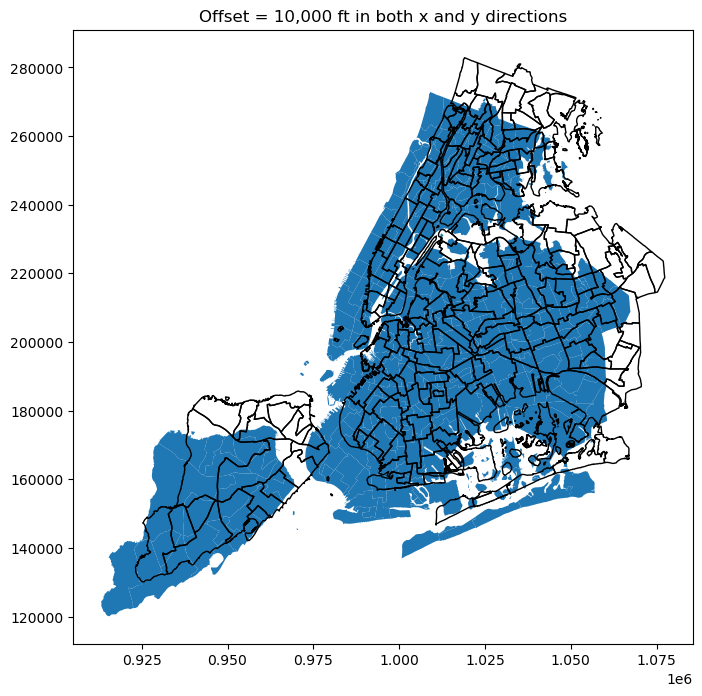

In [96]:
# previewing the new offset shape
fig, ax = plt.subplots(figsize=(8, 8))

nta_shape.plot(ax=ax)

(nta_shape
 .set_geometry('offset')
 .plot(
     ax=ax,
     color='none',
     edgecolor='black')
)

ax.set_title('Offset = 10,000 ft in both x and y directions')

<AxesSubplot: >

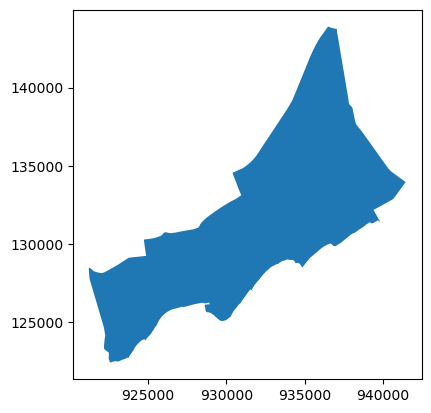

In [97]:
# we will use this nta shape to analyze overlay methods
(nta_shape
 .loc[nta_shape['NTACode'] == 'SI01']
 .plot()
)

In [98]:
nta_shape = nta_shape.loc[nta_shape['NTACode'] == 'SI01']
nta_shape.head()

OBJECTID  BoroCode       BoroName CountyFIPS NTACode  \
163       164         5  Staten Island        085    SI01   

                                        NTAName   Shape__Area  Shape__Length  \
163  Annadale-Huguenot-Prince's Bay-Eltingville  1.411882e+08   71302.665136   

                                              geometry  \
163  POLYGON ((937062.171 143745.645, 937059.438 14...   

                                                offset  
163  POLYGON ((947062.171 153745.645, 947059.438 15...

In [99]:
offset = nta_shape.set_geometry('offset')
offset.head()

OBJECTID  BoroCode       BoroName CountyFIPS NTACode  \
163       164         5  Staten Island        085    SI01   

                                        NTAName   Shape__Area  Shape__Length  \
163  Annadale-Huguenot-Prince's Bay-Eltingville  1.411882e+08   71302.665136   

                                              geometry  \
163  POLYGON ((937062.171 143745.645, 937059.438 14...   

                                                offset  
163  POLYGON ((947062.171 153745.645, 947059.438 15...

Text(0.5, 1.0, 'Overlay = None (Original Shapes)')

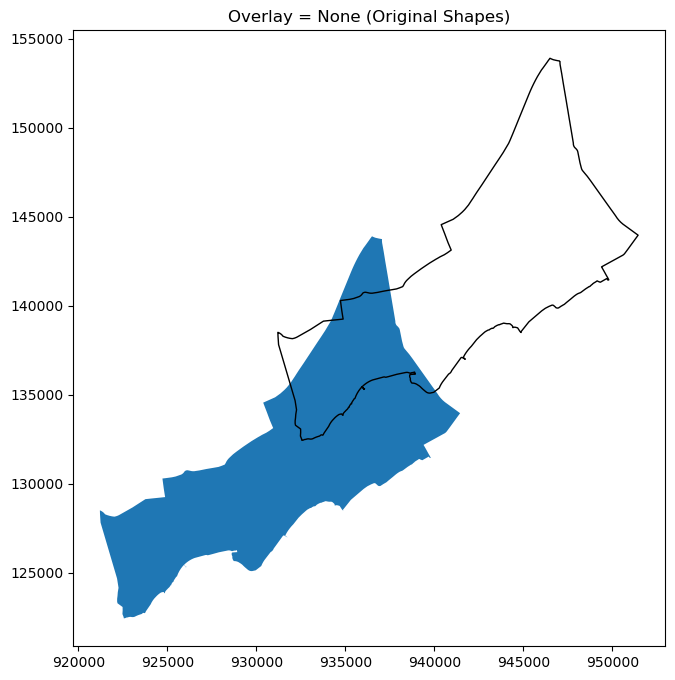

In [100]:
fig, ax = plt.subplots(figsize=(8, 8))

nta_shape.plot(ax=ax)

offset.plot(ax=ax, color='None', edgecolor='black')
ax.set_title('Overlay = None (Original Shapes)')

## 11.1 Union

Text(0.5, 1.0, 'Overlay = Union')

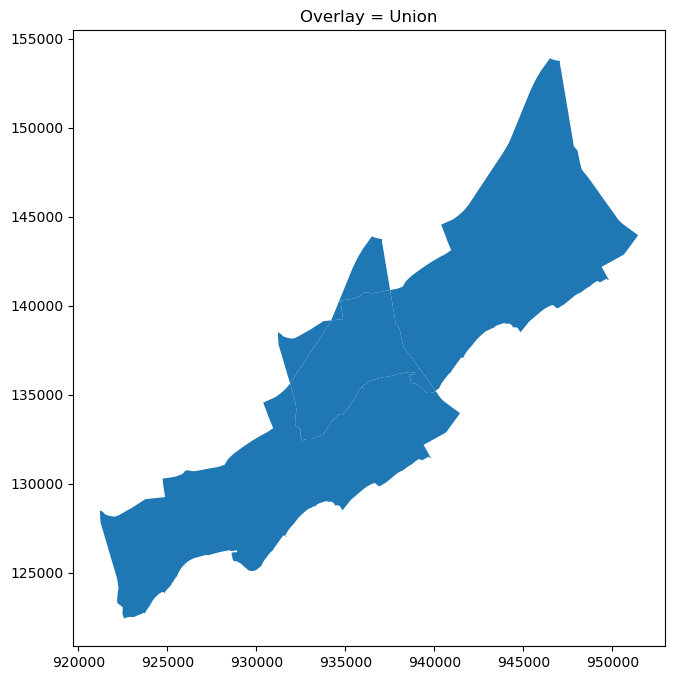

In [101]:
fig, ax = plt.subplots(figsize=(8, 8))

# analyzing union overlay method
union = gpd.overlay(
    nta_shape,
    offset, 
    how='union'
)

union.plot(ax=ax)
ax.set_title('Overlay = Union')

## 11.2 Intersection

Text(0.5, 1.0, 'Overlay = Intersection')

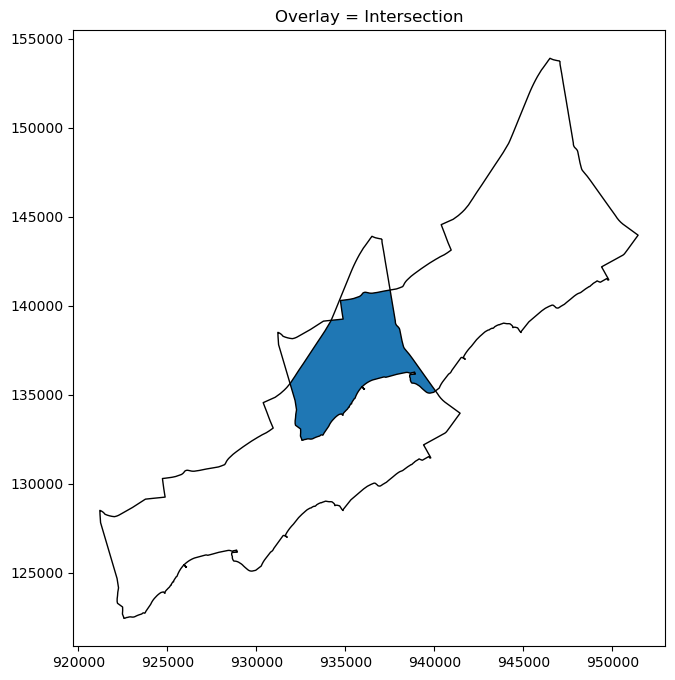

In [102]:
fig, ax = plt.subplots(figsize=(8, 8))

# analyzing the intersection overlay method
intersection = gpd.overlay(
    nta_shape,
    offset, 
    how='intersection'
)

intersection.plot(ax=ax)
offset.plot(ax=ax, color='None', edgecolor='black')
nta_shape.plot(ax=ax, color='None',  edgecolor='black')

ax.set_title('Overlay = Intersection')

## 11.3 Symmetric Difference

Text(0.5, 1.0, 'Overlay = Symmetric Difference')

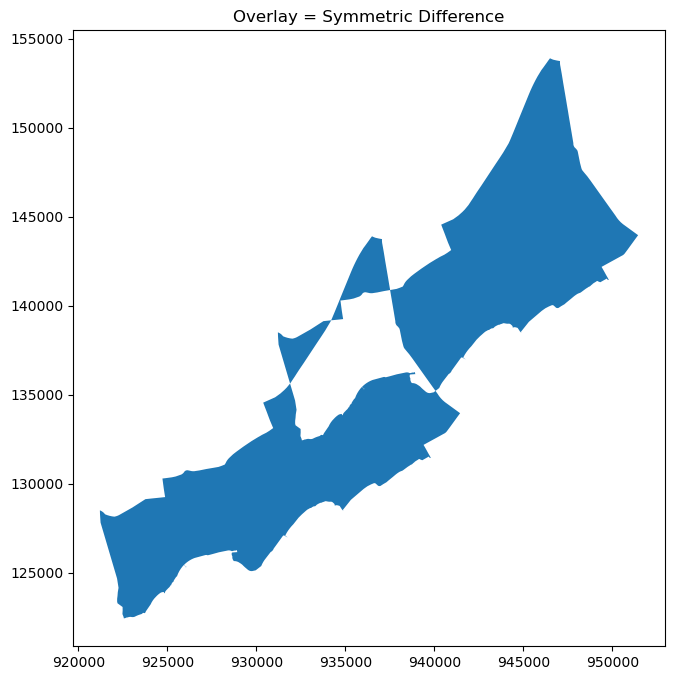

In [103]:
fig, ax = plt.subplots(figsize=(8, 8))

# analyzing the symmetric_difference overlay method
symmetric_difference = gpd.overlay(
    nta_shape,
    offset,
    how='symmetric_difference'
)

symmetric_difference.plot(ax=ax)
ax.set_title('Overlay = Symmetric Difference')

## 11.4 Difference

Text(0.5, 1.0, 'Overlay = Difference')

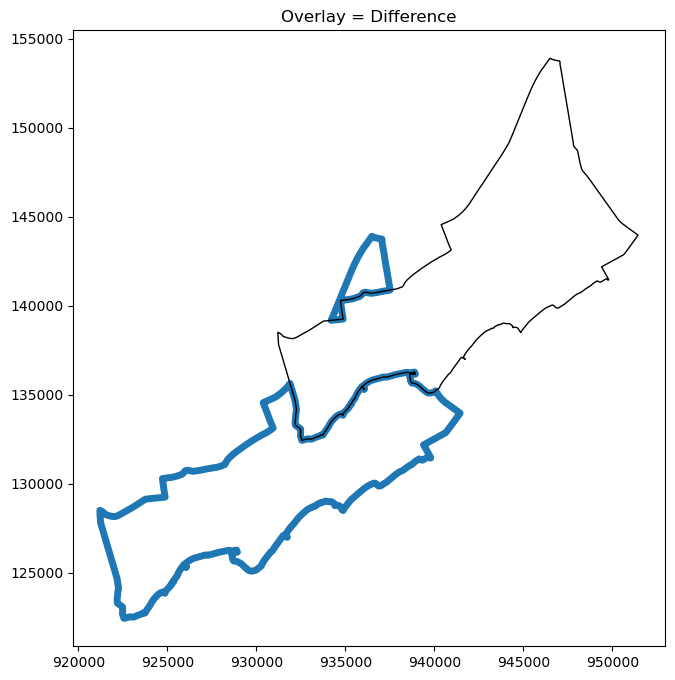

In [104]:
fig, ax = plt.subplots(figsize=(8, 8))

# analyzing the difference overlay method
difference = gpd.overlay(
    nta_shape,
    offset,
    how='difference'
)

difference.plot(ax=ax, color='None', edgecolor='#1f77b4', linewidth=5)
offset.plot(ax=ax, color='None', edgecolor='black', zorder=1)

ax.set_title('Overlay = Difference')

## 11.5 Identity

Text(0.5, 1.0, 'Overlay = Identity')

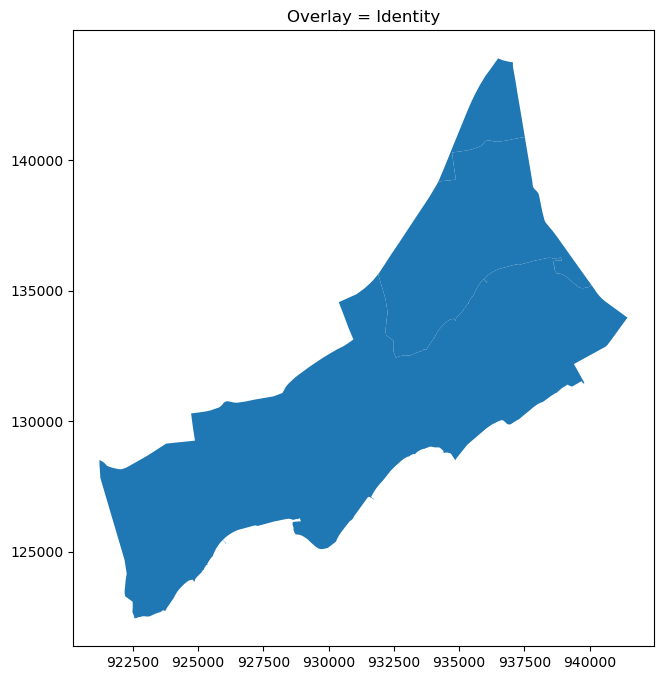

In [105]:
fig, ax = plt.subplots(figsize=(8, 8))

# analyzing the identity overlay method
identity = gpd.overlay(
    nta_shape, 
    offset, 
    how='identity'
)

identity.plot(ax=ax)
ax.set_title('Overlay = Identity')

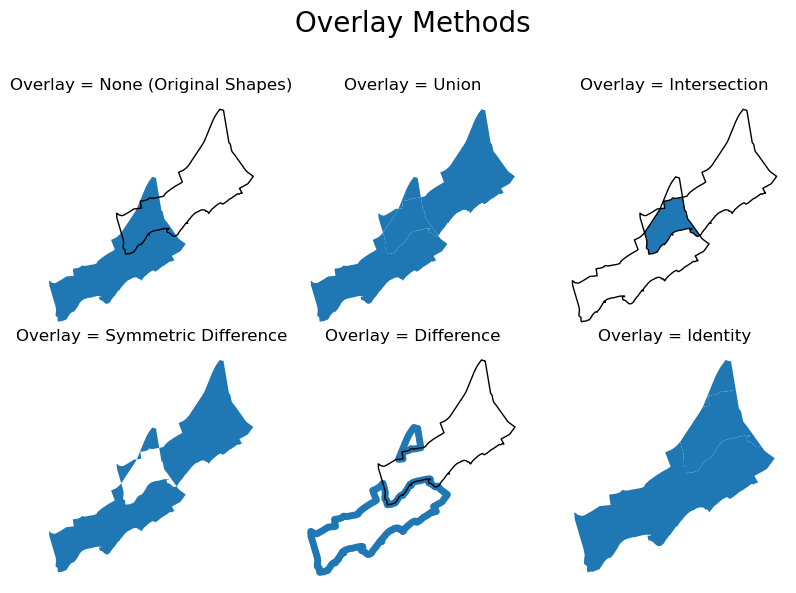

In [106]:
# plotting overlay methods
fig, axs = plt.subplots(2, 3, sharey=False, figsize=(8,6))

nta_shape.plot(ax=axs[0, 0])
offset.plot(ax=axs[0, 0], color='None', edgecolor='black')
axs[0, 0].set_title('Overlay = None (Original Shapes)')
axs[0, 0].axis('off')

union = gpd.overlay(nta_shape, offset, how='union')
union.plot(ax=axs[0, 1])
axs[0, 1].set_title('Overlay = Union')
axs[0, 1].axis('off')

intersection = gpd.overlay(nta_shape, offset, how='intersection')
intersection.plot(ax=axs[0, 2])
offset.plot(ax=axs[0, 2], color='None', edgecolor='black')
nta_shape.plot(ax=axs[0, 2], color='None',  edgecolor='black')
axs[0, 2].set_title('Overlay = Intersection')
axs[0, 2].axis('off')

symmetric_difference = gpd.overlay(nta_shape, offset, how='symmetric_difference')
symmetric_difference.plot(ax=axs[1, 0])
axs[1, 0].set_title('Overlay = Symmetric Difference')
axs[1, 0].axis('off')

difference = gpd.overlay(nta_shape, offset, how='difference')
difference.plot(ax=axs[1, 1], color='None', edgecolor='#1f77b4', linewidth=5)
offset.plot(ax=axs[1, 1], color='None', edgecolor='black', zorder=1)
axs[1, 1].set_title('Overlay = Difference')
axs[1, 1].axis('off')

identity = gpd.overlay(nta_shape, offset, how='identity')
identity.plot(ax=axs[1, 2])
axs[1, 2].set_title('Overlay = Identity')
axs[1, 2].axis('off')

fig.suptitle("Overlay Methods\n", fontsize=20)
fig.tight_layout()

## 11.6 Aggregation with Dissolve

In [107]:
# new nta geometries
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path).to_crs(2263)

print(f'shape of data: {nta_shape.shape}')
nta_shape.head()

shape of data: (195, 9)


OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  
0  POLYGON ((1052995.809 196310.668, 1053081.291 ...  
1  MULTIPOLYGON (((1015235.757 174913.308, 101523...  
2  POLYGON ((1013128.128 250640.950, 1012847.931 ...  
3  POLYGON ((1040670.963 208321.638, 1040674.379 ...  
4  POLYGON ((1041061.605 215432.756, 1041114.781 ...

<AxesSubplot: >

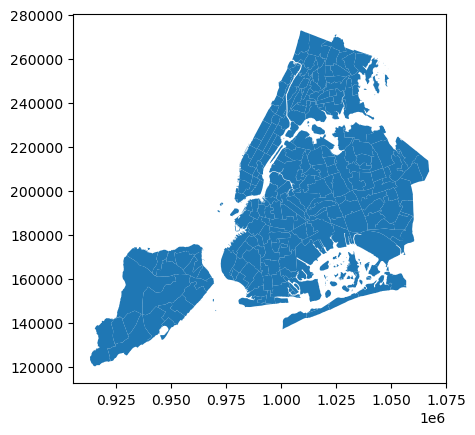

In [108]:
# sanity plot
nta_shape.plot()

In [109]:
# dissolving nta shapes by borough
boro = nta_shape.dissolve(by='BoroName')
boro.head()

geometry  OBJECTID  \
BoroName                                                                     
Bronx          MULTIPOLYGON (((1012160.593 229483.575, 101234...         3   
Brooklyn       MULTIPOLYGON (((995135.690 148355.320, 995109....         2   
Manhattan      MULTIPOLYGON (((981865.002 189300.016, 981932....        41   
Queens         MULTIPOLYGON (((1016735.199 146379.213, 101674...         1   
Staten Island  MULTIPOLYGON (((952732.205 138976.547, 952723....        16   

               BoroCode CountyFIPS NTACode  \
BoroName                                     
Bronx                 2        005    BX41   
Brooklyn              3        047    BK50   
Manhattan             1        061    MN19   
Queens                4        081    QN08   
Staten Island         5        085    SI11   

                                              NTAName   Shape__Area  \
BoroName                                                              
Bronx                                      Mount Hope  1.471671e+07   
Brooklyn                                     Canarsie  8.208977e+07   
Manhattan                     Turtle Bay-East Midtown  1.739017e+07   
Queens                                     St. Albans  7.741275e+07   
Staten Island  Charleston-Richmond Valley-Tottenville  1.455343e+08   

               Shape__Length  
BoroName                      
Bronx           18937.248075  
Brooklyn        43702.962968  
Manhattan       21251.841449  
Queens          45401.316916  
Staten Island   84980.495369

<AxesSubplot: >

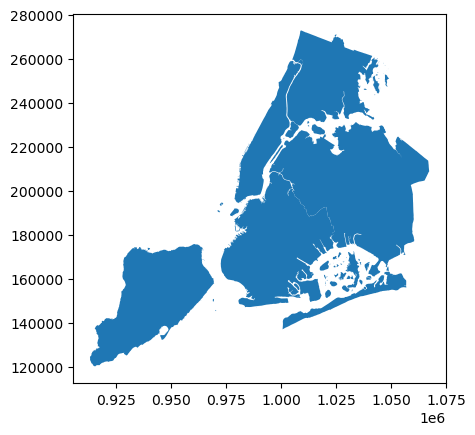

In [110]:
# sanity plot
boro.plot()

# 12. Additional Attributes and Methods

## 12.1 Unary Predicates

In [111]:
# is empty
(nta_shape
 .geometry
 .is_empty
 .value_counts()
)

False    195
dtype: int64

In [112]:
# is null
(nta_shape
 .geometry
 .isnull()
 .value_counts()
)

False    195
Name: geometry, dtype: int64

In [113]:
# is simple
(nta_shape['geometry']
 .is_simple
 .value_counts()
)

True    195
dtype: int64

## 12.2 Binary Predicates

In [114]:
# new nta geometries
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path).to_crs(epsg=2263)

print(nta_shape.shape)
nta_shape.head()

(195, 9)


OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  
0  POLYGON ((1052995.809 196310.668, 1053081.291 ...  
1  MULTIPOLYGON (((1015235.757 174913.308, 101523...  
2  POLYGON ((1013128.128 250640.950, 1012847.931 ...  
3  POLYGON ((1040670.963 208321.638, 1040674.379 ...  
4  POLYGON ((1041061.605 215432.756, 1041114.781 ...

### 12.2.1 Centroids vs. Representative Points

In [115]:
(nta_shape
 .centroid
 .geom_almost_equals(nta_shape.centroid)
 .value_counts()
)

True    195
dtype: int64

In [116]:
# an nta's shape centroid does not equal their representative point
(nta_shape
 .centroid
 .geom_almost_equals(nta_shape.representative_point())
 .value_counts()
)

False    195
dtype: int64

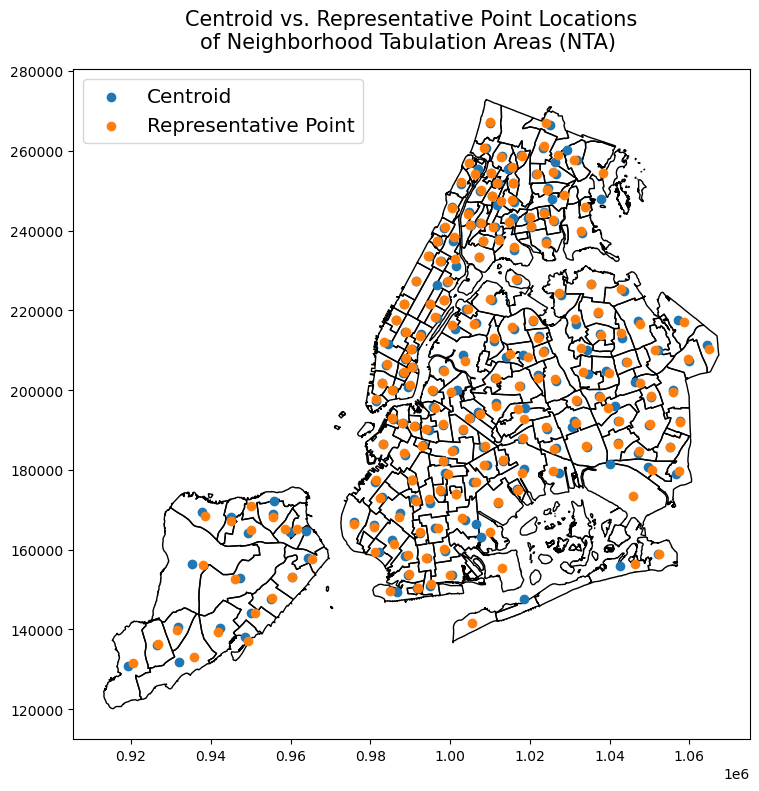

In [117]:
fig, ax = plt.subplots(figsize=(8, 8))

nta_shape.plot(
    ax=ax, 
    color='none', 
    edgecolor='black'
)

nta_shape.centroid.plot(
    ax=ax, 
    label='Centroid'
)

(nta_shape
 .representative_point()
 .plot(ax=ax, label='Representative Point')
)

ax.legend(loc=2, fontsize='x-large')
ax.set_title(
    'Centroid vs. Representative Point Locations\nof Neighborhood Tabulation Areas (NTA) ', 
    fontsize=15, pad=15
)

plt.tight_layout()

## 12.3 Constructive Methods

In [118]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path).to_crs(epsg=2263)

print(nta_shape.shape)
nta_shape.head()

(195, 9)


OBJECTID  BoroCode  BoroName CountyFIPS NTACode  \
0         1         4    Queens        081    QN08   
1         2         3  Brooklyn        047    BK50   
2         3         2     Bronx        005    BX41   
3         4         4    Queens        081    QN38   
4         5         4    Queens        081    QN52   

                              NTAName   Shape__Area  Shape__Length  \
0                          St. Albans  7.741275e+07   45401.316916   
1                            Canarsie  8.208977e+07   43702.962968   
2                          Mount Hope  1.471671e+07   18937.248075   
3  Pomonok-Flushing Heights-Hillcrest  3.883592e+07   30731.419625   
4                       East Flushing  2.945368e+07   25848.545510   

                                            geometry  
0  POLYGON ((1052995.809 196310.668, 1053081.291 ...  
1  MULTIPOLYGON (((1015235.757 174913.308, 101523...  
2  POLYGON ((1013128.128 250640.950, 1012847.931 ...  
3  POLYGON ((1040670.963 208321.638, 1040674.379 ...  
4  POLYGON ((1041061.605 215432.756, 1041114.781 ...

### 12.3.1 Buffer

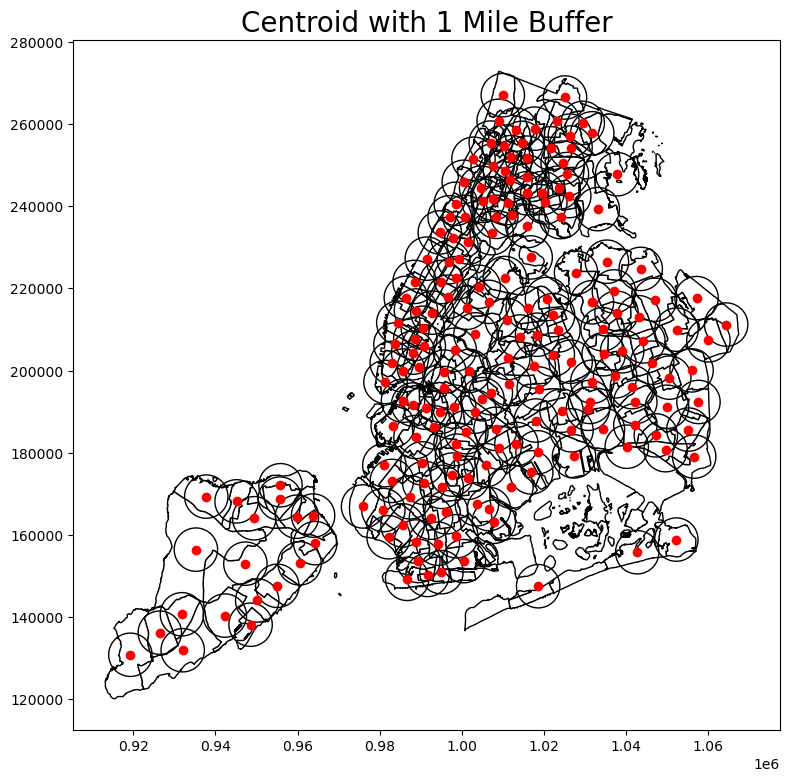

In [119]:
fig, ax = plt.subplots(figsize=(8, 8))

# plotting a one mile radius buffer of the nta centroid
(nta_shape
 .centroid
 .buffer(5280)
 .plot(ax=ax, color='none', edgecolor='black')
)

(nta_shape
 .centroid
 .plot(ax=ax, color='red', edgecolor='red')
)

nta_shape.plot(
    ax=ax,
    color='white', 
    edgecolor='black', 
    zorder=0
)

ax.set_title('Centroid with 1 Mile Buffer', fontsize=20)

fig.tight_layout()

### 12.3.2 Translate/Offset

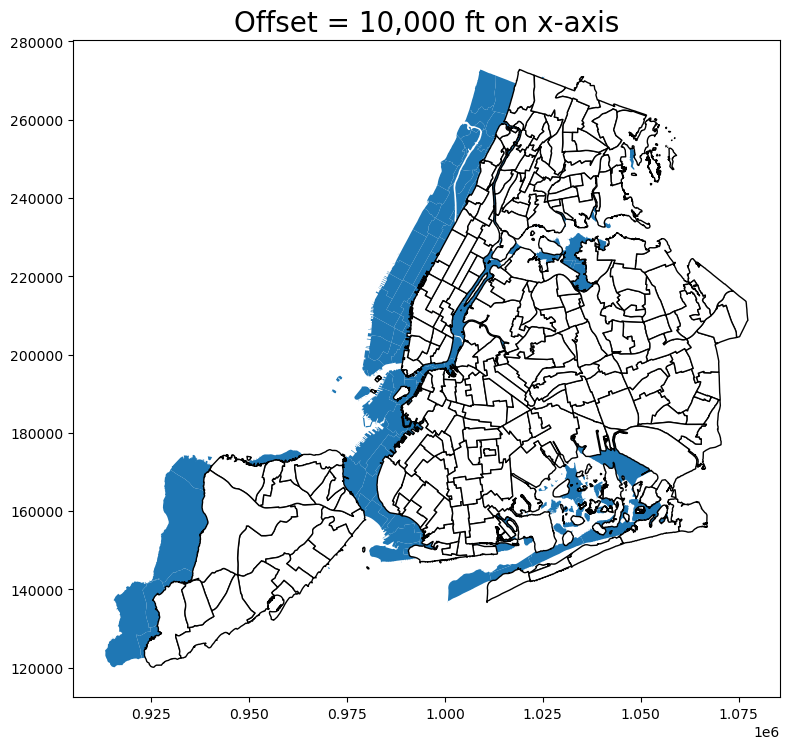

In [120]:
fig, ax = plt.subplots(figsize=(8, 8))

# offset the nta shapes 10,000 feet to the right along the x-axis.
(nta_shape
 .translate(10000)
 .plot(ax=ax, color='white', edgecolor='black')
)

nta_shape.plot(
    ax=ax, 
    zorder=0
)

ax.set_title('Offset = 10,000 ft on x-axis', fontsize=20)
fig.tight_layout()

# 13. Conclusion

In this notebook, we reviewed how to work with geospatial data and create various types of maps with the Python library geopandas.